In [1]:
import pandas as pd
import numpy as np
import warnings

pd.options.display.max_columns = None
warnings.filterwarnings("ignore")

from google.cloud import bigquery
from google.cloud import bigquery_storage
creds = "/Users/srdeo/Documents/DS_Test/cprtpr-datastewards-sp1-stewardapp-prbq 2 1.json"
client = bigquery.Client.from_service_account_json(json_credentials_path=creds)
bqstorageclient = bigquery_storage.BigQueryReadClient(credentials=creds)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
from google.cloud import bigquery
from google.cloud import bigquery_storage
creds = "/Users/srdeo/Documents/DS_Test/cprtpr-datastewards-sp1-stewardapp-prbq 2 1.json"
client = bigquery.Client.from_service_account_json(json_credentials_path=creds)
bqstorageclient = bigquery_storage.BigQueryReadClient(credentials=creds)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [10]:
query = """
select distinct bid_type_desc, buyer_nbr, max(bid_dttm)
from `cprtpr-dataplatform-sp1`.usviews.v_us_bids_fact
group by 1,2
"""

In [67]:
data = client.query(query).to_dataframe()

In [68]:
data_copy = data.copy()

In [69]:
data.head()

,bid_type_desc,buyer_nbr,f0_
0,Make an Offer,426600,2021-12-21 17:55:50+00:00
1,Make an Offer,922801,2022-07-13 20:43:14+00:00
2,Make an Offer,335913,2022-01-07 01:08:57+00:00
3,Make an Offer,39765,2025-04-11 02:47:51+00:00
4,Make an Offer,170485,2024-04-22 16:57:58+00:00


In [108]:
data['bid_type_desc'].value_counts()

bid_type_desc
Preliminary Bid           521559
Virtual Bid (VB3 Live)    374320
Member Counter Bid        164187
Buy It Now                112395
Manual Award               60888
Make an Offer               4359
Name: count, dtype: int64

## Six different types of bids : 
1. **Prelim Bid** : Bids that can be placed in the future (42%)
2. **Virtual Bid** : Bids that happen live (30%)
3. **Member Counter Bid** : Members have the power to counter the bid (13%)
4. **Buy It Now** : Marketplace, can buy right away (Like amazon) (9%)
5. **Manual Award** :  (4%)
6. **Make an Offer** : 

In [109]:
(data['bid_type_desc'].value_counts()/data.shape[0])*100

bid_type_desc
Preliminary Bid           42.139099
Virtual Bid (VB3 Live)    30.242998
Member Counter Bid        13.265407
Buy It Now                 9.080898
Manual Award               4.919416
Make an Offer              0.352183
Name: count, dtype: float64

In [70]:
data['date_last_bid'] = data['f0_'].dt.date

In [71]:
data.head()

,bid_type_desc,buyer_nbr,f0_,date_last_bid
0,Make an Offer,426600,2021-12-21 17:55:50+00:00,2021-12-21
1,Make an Offer,922801,2022-07-13 20:43:14+00:00,2022-07-13
2,Make an Offer,335913,2022-01-07 01:08:57+00:00,2022-01-07
3,Make an Offer,39765,2025-04-11 02:47:51+00:00,2025-04-11
4,Make an Offer,170485,2024-04-22 16:57:58+00:00,2024-04-22


In [72]:
from datetime import datetime
current_date = pd.to_datetime(datetime.utcnow())

In [73]:
data.drop(['f0_'], axis=1, inplace= True)

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1237708 entries, 0 to 1237707
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   bid_type_desc  1237708 non-null  object
 1   buyer_nbr      1237708 non-null  Int64 
 2   date_last_bid  1237708 non-null  object
dtypes: Int64(1), object(2)
memory usage: 29.5+ MB


In [75]:
data['date_last_bid'] = pd.to_datetime(data['date_last_bid'])

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1237708 entries, 0 to 1237707
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   bid_type_desc  1237708 non-null  object        
 1   buyer_nbr      1237708 non-null  Int64         
 2   date_last_bid  1237708 non-null  datetime64[ns]
dtypes: Int64(1), datetime64[ns](1), object(1)
memory usage: 29.5+ MB


In [77]:
data['days_diff'] = (current_date - data['date_last_bid']).dt.days

In [78]:
data.head(10)

,bid_type_desc,buyer_nbr,date_last_bid,days_diff
0,Make an Offer,426600,2021-12-21,1259
1,Make an Offer,922801,2022-07-13,1055
2,Make an Offer,335913,2022-01-07,1242
3,Make an Offer,39765,2025-04-11,52
4,Make an Offer,170485,2024-04-22,406
5,Make an Offer,345837,2024-02-26,462
6,Make an Offer,912862,2021-01-07,1607
7,Make an Offer,415913,2021-01-22,1592
8,Make an Offer,322971,2022-04-01,1158
9,Make an Offer,889460,2021-07-10,1423


In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

## Distribution of Days Since Last bid date

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='days_diff', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Days Since Past Dates')

Text(0.5, 0, 'Days Difference')

Text(0, 0.5, 'Frequency')

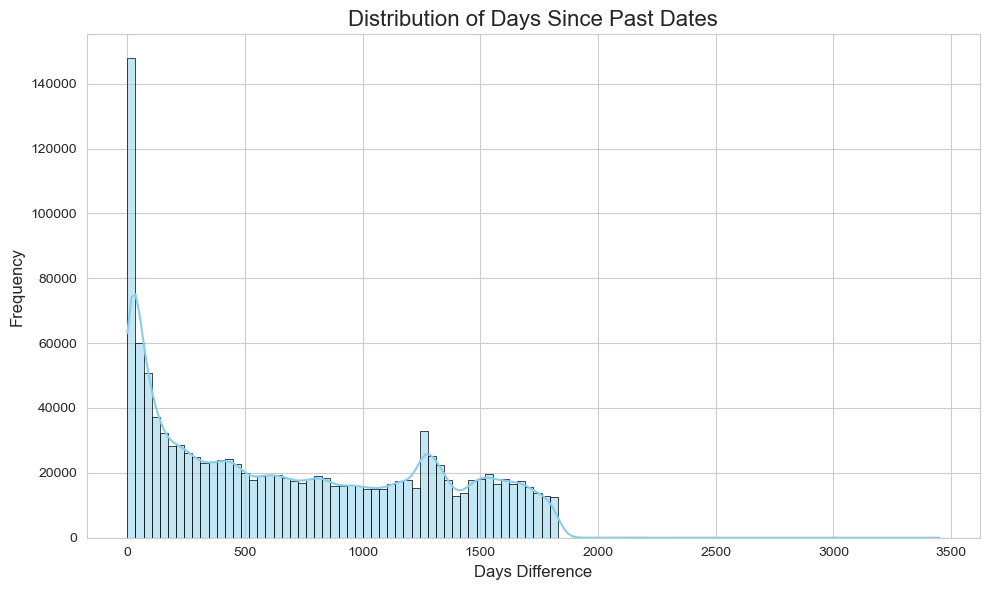

In [80]:
# Plot
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.histplot(data['days_diff'], kde=True, bins=100, color='skyblue', edgecolor='black')

# Titles and labels
plt.title('Distribution of Days Since Past Dates', fontsize=16)
plt.xlabel('Days Difference', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

<Figure size 800x400 with 0 Axes>

<Axes: xlabel='days_diff'>

Text(0.5, 1.0, 'Boxplot of Days Since Past Dates')

Text(0.5, 0, 'Days Difference')

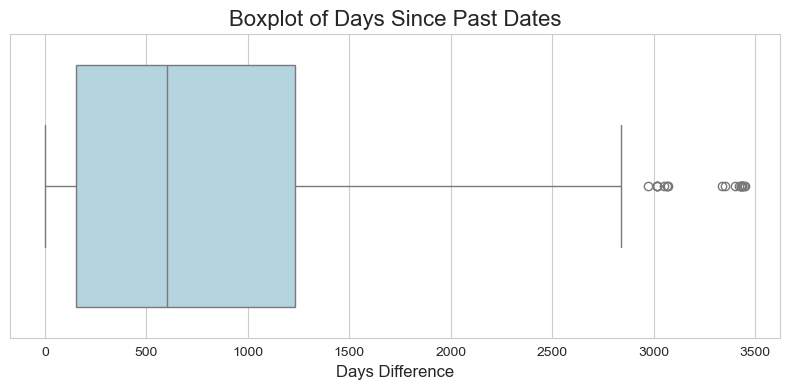

In [81]:
plt.figure(figsize=(8, 4))
sns.set_style("whitegrid")
sns.boxplot(x=data['days_diff'], color='lightblue')

# Titles and labels
plt.title('Boxplot of Days Since Past Dates', fontsize=16)
plt.xlabel('Days Difference', fontsize=12)

plt.tight_layout()
plt.show()

## Different bid types vs Days

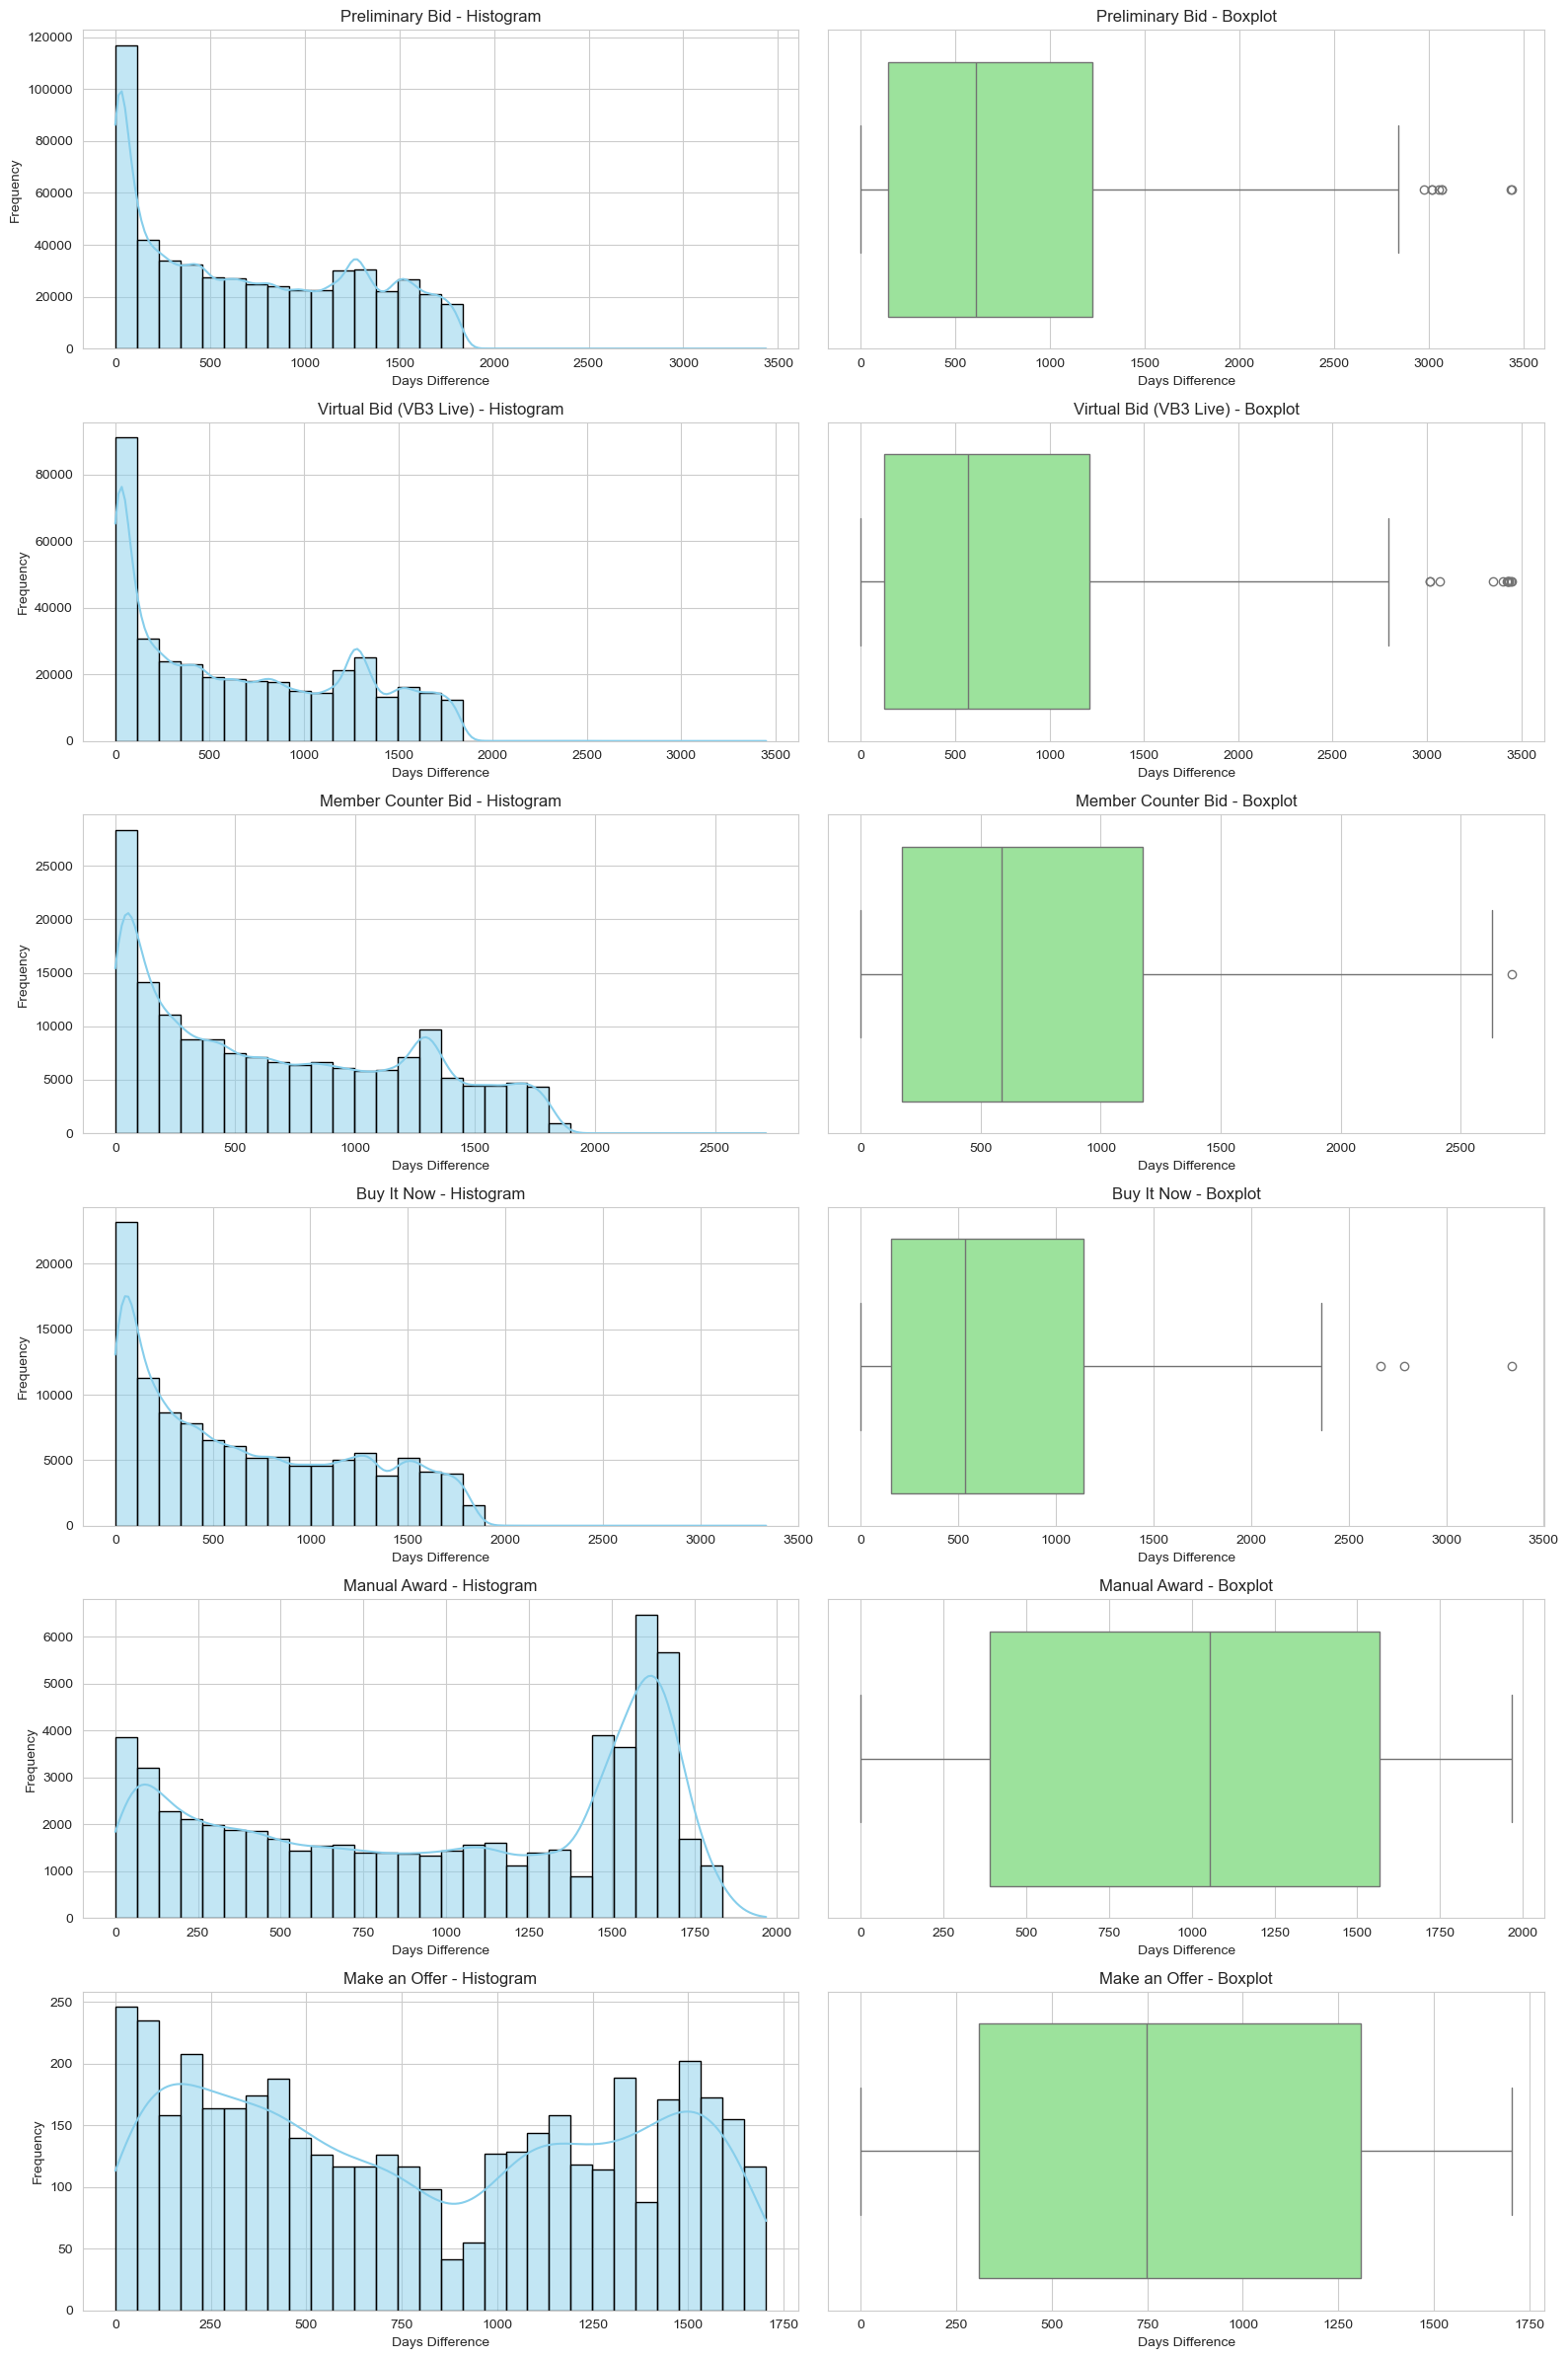

In [93]:
category = [
    'Preliminary Bid', 'Virtual Bid (VB3 Live)', 'Member Counter Bid',
    'Buy It Now', 'Manual Award', 'Make an Offer'
]

# Set up plot grid: 6 rows × 2 columns
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(16, 24))
sns.set_style("whitegrid")

for i, category in enumerate(categories):
    cat_data = data[data['bid_type_desc'] == category]

    # Histogram subplot
    sns.histplot(cat_data['days_diff'], kde=True, bins=30,
                 color='skyblue', edgecolor='black', ax=axes[i, 0])
    axes[i, 0].set_title(f"{category} - Histogram")
    axes[i, 0].set_xlabel('Days Difference')
    axes[i, 0].set_ylabel('Frequency')

    # Boxplot subplot
    sns.boxplot(x=cat_data['days_diff'], color='lightgreen', ax=axes[i, 1])
    axes[i, 1].set_title(f"{category} - Boxplot")
    axes[i, 1].set_xlabel('Days Difference')
    axes[i, 1].set_ylabel('')

# Adjust layout
plt.tight_layout()
plt.show();

## Duplicated buyers

In [110]:
data.groupby('buyer_nbr')['days_diff'].count()

buyer_nbr
3         2
5         2
7         1
8         2
9         2
         ..
999833    2
999906    3
999993    5
999998    1
999999    2
Name: days_diff, Length: 560442, dtype: int64

In [99]:
data[data['buyer_nbr'] == 999993]

,bid_type_desc,buyer_nbr,date_last_bid,days_diff
61162,Buy It Now,999993,2018-02-13,2666
148511,Manual Award,999993,2021-01-17,1597
327265,Member Counter Bid,999993,2023-09-12,629
366770,Preliminary Bid,999993,2025-03-26,68
971060,Virtual Bid (VB3 Live),999993,2023-09-12,629


In [107]:
data.duplicated(subset=['buyer_nbr']).sum()/data.shape[0] * 100

54.719368380910524

In [111]:
data[data['buyer_nbr'] == 7]

,bid_type_desc,buyer_nbr,date_last_bid,days_diff
573138,Preliminary Bid,7,2021-11-26,1284


In [115]:
query1 = """
select *
from `cprtpr-dataplatform-sp1`.usviews.v_us_member_fact limit 10
"""

data1 = client.query(query1).to_dataframe()

In [116]:
data1.head()

,mbr_nbr,mbr_id,mbr_name,mbr_company,mbr_city,mbr_state,mbr_country,mbr_country_desc,mbr_status,owner_mbr_nbr,mbr_site_grp_cd,mbr_site_status_cd,mbr_site_status_desc,mbr_product_cd,mbr_purchase_site_cd,mbr_mbrshp_type_cd,mbr_email,mbr_lic_type,mbr_derived_lic_type,dismantler_flag,first_login_dt,last_login_dt,mbr_phone1,mbr_phone2,mbr_first_reg_dt,mbr_first_active_dt,mbr_first_reg_paid_dt,mbr_first_basic_reg_paid_dt,mbr_first_bid_dt,mbr_last_bid_dt,mbr_first_auc_attend_dt,mbr_last_auc_attend_dt,mbr_first_purchase_dt,mbr_last_purchase_dt,mbr_first_deposit_paid_amt,mbr_first_deposit_paid_dt,mbr_last_deposit_paid_amt,mbr_last_deposit_paid_dt,mbr_first_mbrshp_start_dt,mbr_reg_site_cd,mbr_addr,mbr_zipcode,mbr_first_premier_upgrade_dt,mbr_first_basic_upgrade_dt,mbr_first_doc_upload_dt,mbr_last_doc_upload_dt,mbr_access_type,mbr_mbrshp_renew_due_dt,mbr_mbrshp_exp_dt,first_purchase_invoice_dt,last_purchase_invoice_dt,lots_won,lots_bid,aucs_joined,intl_location_flag,intl_ip_flag,intl_doc_flag,intl_manual_flag,auto_renewal_flag,mbr_location,intl_export_flag,bid_limit_count,bid_limit_amt,bid_limit_durtn_cd,bid_limit_durtn_desc,mbr_reg_src_cd,crm_id,deposit_amt,unapplied_fund,company_flag,dealer_flag,export_flag,other_business_flag,general_business_flag,automotive_related_business_flag,consumer_flag,all_other_lic_flag,mbr_type,live_bid_remaining_cnt,mbr_mail_name,mbr_mail_address,mbr_mail_city,mbr_mail_state,mbr_mail_zip,mbr_mail_zip_plus,mbr_mail_cntry,mbr_owner_1_name,mbr_owner_1_area_cd,mbr_owner_1_phone,mbr_owner_1_ext,mbr_owner_2_name,mbr_owner_2_area_cd,mbr_owner_2_phone,mbr_owner_2_ext,owner_mbr_lic_type,buyer_mail_title_docs_flag,mbr_volume_pricing_flag,mbr_volume_pricing_flag_ca,member_sgmnt_type,member_derived_sgmnt_type,mbr_mbrshp_status_cd,auction_access_flag,veriff_flag,selected_segment_type,export_import_flag,mbr_lang_pref,mbr_reg_site_lang
0,1277649661543452672,49211247,Marco Aguirre,None,None,None,None,None,None,1277649661543452672,USPLUS,P,PENDING,None,None,GUEST,aguilugotony345@gmail.com,None,License Type Not Available,None,None,None,None,None,2024-08-26 15:23:36+00:00,NaT,None,None,None,None,None,None,None,None,NaN,None,NaN,None,NaT,CPRTUS,None,None,NaT,NaT,NaT,NaT,REGULAR,2999-12-31,2999-12-31,None,None,<NA>,<NA>,<NA>,None,None,None,None,None,Domestic,None,<NA>,NaN,None,None,mobile,ec7184c2-acff-45eb-95e8-6f63931b1be3,NaN,NaN,N,None,None,None,None,None,None,None,GUEST,<NA>,MARCO AGUIRRE,None,None,None,None,,None,None,None,None,<NA>,None,None,None,<NA>,None,None,L,L,None,None,I,N,<NA>,None,<NA>,en,None
1,1278118031495127040,49258703,cesar aguilar,None,None,None,None,None,None,1278118031495127040,USPLUS,P,PENDING,None,None,GUEST,paulo.wurthmex@gmail.com,None,License Type Not Available,None,None,None,None,None,2024-08-27 22:24:45+00:00,NaT,None,None,None,None,None,None,None,None,NaN,None,NaN,None,NaT,CPRTUS,None,None,NaT,NaT,NaT,NaT,REGULAR,2999-12-31,2999-12-31,None,None,<NA>,<NA>,<NA>,None,None,None,None,None,Domestic,None,<NA>,NaN,None,None,web,f53ecc47-7e85-494e-9f03-e2ca528b2c3d,NaN,NaN,N,None,None,None,None,None,None,None,GUEST,<NA>,CESAR AGUILAR,None,None,None,None,,None,None,None,None,<NA>,None,None,None,<NA>,None,None,L,L,None,None,I,N,<NA>,None,<NA>,en,es
2,1277880245423161344,49235291,Caelyn Halliday,None,None,None,None,None,None,1277880245423161344,USPLUS,P,PENDING,None,None,GUEST,challiday2023@gmail.com,None,License Type Not Available,None,None,None,None,None,2024-08-27 06:39:52+00:00,NaT,None,None,None,None,None,None,None,None,NaN,None,NaN,None,NaT,CPRTUS,None,None,NaT,NaT,NaT,NaT,REGULAR,2999-12-31,2999-12-31,None,None,<NA>,<NA>,<NA>,None,None,None,None,None,Domestic,None,<NA>,NaN,None,None,web,7a52f323-dbc7-4022-8bb0-cc05fde412b7,NaN,NaN,N,None,None,None,None,None,None,None,GUEST,<NA>,CAELYN HALLIDAY,None,None,None,None,,None,None,None,None,<NA>,None,None,None,<NA>,None,None,L,L,None,None,I,N,<NA>,None,<NA>,en,en
3,1278075889512140800,49253503,Emil Ustayev,None,None,None,None,None,None,1278075889512140800,US

In [118]:
data1[data1['mbr_id'] == '999993']

,mbr_nbr,mbr_id,mbr_name,mbr_company,mbr_city,mbr_state,mbr_country,mbr_country_desc,mbr_status,owner_mbr_nbr,mbr_site_grp_cd,mbr_site_status_cd,mbr_site_status_desc,mbr_product_cd,mbr_purchase_site_cd,mbr_mbrshp_type_cd,mbr_email,mbr_lic_type,mbr_derived_lic_type,dismantler_flag,first_login_dt,last_login_dt,mbr_phone1,mbr_phone2,mbr_first_reg_dt,mbr_first_active_dt,mbr_first_reg_paid_dt,mbr_first_basic_reg_paid_dt,mbr_first_bid_dt,mbr_last_bid_dt,mbr_first_auc_attend_dt,mbr_last_auc_attend_dt,mbr_first_purchase_dt,mbr_last_purchase_dt,mbr_first_deposit_paid_amt,mbr_first_deposit_paid_dt,mbr_last_deposit_paid_amt,mbr_last_deposit_paid_dt,mbr_first_mbrshp_start_dt,mbr_reg_site_cd,mbr_addr,mbr_zipcode,mbr_first_premier_upgrade_dt,mbr_first_basic_upgrade_dt,mbr_first_doc_upload_dt,mbr_last_doc_upload_dt,mbr_access_type,mbr_mbrshp_renew_due_dt,mbr_mbrshp_exp_dt,first_purchase_invoice_dt,last_purchase_invoice_dt,lots_won,lots_bid,aucs_joined,intl_location_flag,intl_ip_flag,intl_doc_flag,intl_manual_flag,auto_renewal_flag,mbr_location,intl_export_flag,bid_limit_count,bid_limit_amt,bid_limit_durtn_cd,bid_limit_durtn_desc,mbr_reg_src_cd,crm_id,deposit_amt,unapplied_fund,company_flag,dealer_flag,export_flag,other_business_flag,general_business_flag,automotive_related_business_flag,consumer_flag,all_other_lic_flag,mbr_type,live_bid_remaining_cnt,mbr_mail_name,mbr_mail_address,mbr_mail_city,mbr_mail_state,mbr_mail_zip,mbr_mail_zip_plus,mbr_mail_cntry,mbr_owner_1_name,mbr_owner_1_area_cd,mbr_owner_1_phone,mbr_owner_1_ext,mbr_owner_2_name,mbr_owner_2_area_cd,mbr_owner_2_phone,mbr_owner_2_ext,owner_mbr_lic_type,buyer_mail_title_docs_flag,mbr_volume_pricing_flag,mbr_volume_pricing_flag_ca,member_sgmnt_type,member_derived_sgmnt_type,mbr_mbrshp_status_cd,auction_access_flag,veriff_flag,selected_segment_type,export_import_flag,mbr_lang_pref,mbr_reg_site_lang


In [119]:
query1 = """
select *
from `cprtpr-dataplatform-sp1`.usviews.v_us_lot_fact limit 10
"""

data1 = client.query(query1).to_dataframe()

In [120]:
data1.head()

,lot_nbr,vin_nbr,lot_year,loss_type_cd,loss_type_desc,loss_type_long_desc,lot_make_cd,lot_model,lot_make_model,lot_type_cd,lot_type_desc,lot_type_long_desc,lot_cat_cd,lot_cat_desc,lot_cat_long_desc,damage_type_cd,damage_type_desc,damage_type_long_desc,sec_damage_type_desc,sec_damage_type_long_desc,primary_sod,seller_type_desc,tow_type_cd,tow_type_desc,tow_type_long_desc,sales_title_grp_long_desc,sale_title_state,title_fax_dt,lot_run_cond,lot_run_cond_desc,lot_run_cond_long_desc,has_keys,has_keys_long_desc,loss_dt,assg_dt,auc_dt,pkup_dt,pkup_timestamp,inv_dt,recvry_dt,pkup_clr_dt,title_transfer_dt,dmv_submitted_dt,sale_doc_rcvd_dt,buyer_paid_dt,fnol_dt,lot_left_yard_dt,orig_own_doc_rcvd_dt,pymt_dt,pymt_type_cd,pymt_type_desc,trip_confirm_dt,pymt_to_seller_dt,nicb_report_dt,sale_doc_reject_dt,closed_dt,chrgs_clr_dt,proceeds_chk_dt,relist_dt,pkup_promised_dt,lots_rcvd_dt,hh_rcvd_dt,claim_nbr,insured_name,seller_name,seller_contact_name,seller_parent_company_long_name,seller_parent_company,seller_unit,seller_long_name,seller_nbr,seller_div,seller_rgn,seller_grp,seller_type,seller_type_long_desc,auto_grade_orig,auto_grade_apprvd,auto_grade_by_aim,yard_nbr,sublot_nbr,vinlot_body_style,vinlot_model,yard_name,yard_state_cd,yard_nbr_name,yard_div_id,yard_div,yard_rgn_id,yard_rgn,yard_country_id,yard_country_cd,yard_cap,yard_addr,yard_city,yard_zipcode,virtual_sale_yard_nbr,virtual_sale_yard_name,virtual_sale_yard_nbr_name,yard_state_desc,acv,junk_program,abnormal_close_type,abnormal_close_type_desc,abnormal_close_type_long_desc,sales_title_type,sales_title_grp_desc,assg_method_cd,assg_method_type_desc,assg_method_type_long_desc,lot_stg_desc,long_term_hld_flag,long_term_hld_note,row_location,seller_ref,odo_reading,missing_parts,high_bid_amt,chrgs_due_amt,lot_suffix,contract_program,pkup_rqst_flag,repair_shop_name,repair_shop_addr,repair_shop_city,repair_shop_state,repair_shop_zipcode,repair_shop_phone,min_bid,gross_return,auc_item,btba_flag,net_pcnt,lot_stg,buyer_count,bid_count,sale_title_grp,pkdup_same_day,pkup_promise_days,assg_to_chrgs_clr_bus_days,assg_to_chrgs_clr_cal_days,clr_to_pkup_days,total_adv_chrgs_amt,total_est_adv_chrgs_amt,adv_storage_cal_days,copart_total_chrgs_amt,lots_clr_to_pkup_one_day,lots_clr_to_pkup_more_than_one_day,lots_pkdup_past_promised_dt,program_fee,addtl_svc_fee,title_fee,tow_fee,storage_fee,total_buyer_chrgs,buyer_total_fee,hh_rcvd_by_name,buyer_gate_fee,buyer_mailing_fee,buyer_late_pymt_fee,buyer_storage_fee,buyer_delivery_fee,buyer_hazmat_fee,buyer_relist_fee,buyer_sale_fee,buyer_onsite_payment_fee,loss_to_assg_cal_days,assg_to_pkup_clr_cal_days,pkup_clr_to_pkup_cal_days,pkup_to_trip_confrmd_cal_days,trip_confirmed_to_rcvd_cal_days,pkup_to_orig_owner_doc_cal_days,orig_owner_to_trans_owner_doc_cal_days,trans_owner_doc_to_submit_sales_doc_cal_days,submit_sales_doc_to_sales_doc_rcvd_cal_days,sales_doc_rcvd_to_auc_cal_days,auc_to_buyer_pymt_cal_days,buyer_pymt_to_seller_pymt_cal_days,loss_to_seller_pymt_cal_days,assg_to_auc_cal_days,rcvd_to_lly_cal_days,loss_to_assg_bus_days,assg_to_pkup_clr_bus_days,pkup_clr_to_pkup_bus_days,pkup_to_trip_confrmd_bus_days,trip_confirmed_to_rcvd_bus_days,pkup_to_orig_owner_doc_bus_days,orig_owner_to_trans_owner_doc_bus_days,trans_owner_doc_to_submit_sales_doc_bus_days,submit_sales_doc_to_sales_doc_rcvd_bus_days,sales_doc_rcvd_to_auc_bus_days,auc_to_buyer_pymt_bus_days,buyer_pymt_to_seller_pymt_bus_days,loss_to_seller_pymt_bus_days,assg_to_auc_bus_days,rcvd_to_lly_bus_days,cat_id,assg_to_first_contact_hrs,chrgs_clr_to_pkup_bus_hrs,BU_hrchy_levl1,BU_hrchy_levl2,BU_hrchy_levl3,BU_hrchy_levl4,res_location,win_bid_type,orig_caller,buyer_nbr,broker_program_fee,broker_chrg,broker_credit,buyer_internet_bid_fee,contact_at_honk,sale_title_nbr,buyer_international_fee,grp_model,pkup_hld_flag,airbag_deploy_flag,assg_dttm,assg_timezone,pkup_clr_dttm,chrgs_clr_dttm,pkup_not_clr_cd,pkup_not_clr_reason,chrgs_not_clr_cd,chrgs_not_clr_reason,assg_dttm_pacific,first_contact_dt,first_contact_dt

##----------DAY 2-------------##

In [1]:
import pandas as pd
import numpy as np
import warnings

pd.options.display.max_columns = None
warnings.filterwarnings("ignore")

from google.cloud import bigquery
from google.cloud import bigquery_storage
creds = "/Users/srdeo/Documents/DS_Test/cprtpr-datastewards-sp1-stewardapp-prbq 2 1.json"
client = bigquery.Client.from_service_account_json(json_credentials_path=creds)
bqstorageclient = bigquery_storage.BigQueryReadClient(credentials=creds)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
query1 = """
select *
from `cprtpr-dataplatform-sp1`.usviews.v_us_member_fact
where mbr_mbrshp_type_cd = 'PREMIER'
"""

data1 = client.query(query1).to_dataframe()

### Total number of Premier Members with expiry date in April 2025

In [58]:
data2 = data1[(data1['mbr_mbrshp_exp_dt']>='2025-04-01') & (data1['mbr_mbrshp_exp_dt']<='2025-04-30')]

In [59]:
data2.head()

,mbr_nbr,mbr_id,mbr_name,mbr_company,mbr_city,mbr_state,mbr_country,mbr_country_desc,mbr_status,owner_mbr_nbr,mbr_site_grp_cd,mbr_site_status_cd,mbr_site_status_desc,mbr_product_cd,mbr_purchase_site_cd,mbr_mbrshp_type_cd,mbr_email,mbr_lic_type,mbr_derived_lic_type,dismantler_flag,first_login_dt,last_login_dt,mbr_phone1,mbr_phone2,mbr_first_reg_dt,mbr_first_active_dt,mbr_first_reg_paid_dt,mbr_first_basic_reg_paid_dt,mbr_first_bid_dt,mbr_last_bid_dt,mbr_first_auc_attend_dt,mbr_last_auc_attend_dt,mbr_first_purchase_dt,mbr_last_purchase_dt,mbr_first_deposit_paid_amt,mbr_first_deposit_paid_dt,mbr_last_deposit_paid_amt,mbr_last_deposit_paid_dt,mbr_first_mbrshp_start_dt,mbr_reg_site_cd,mbr_addr,mbr_zipcode,mbr_first_premier_upgrade_dt,mbr_first_basic_upgrade_dt,mbr_first_doc_upload_dt,mbr_last_doc_upload_dt,mbr_access_type,mbr_mbrshp_renew_due_dt,mbr_mbrshp_exp_dt,first_purchase_invoice_dt,last_purchase_invoice_dt,lots_won,lots_bid,aucs_joined,intl_location_flag,intl_ip_flag,intl_doc_flag,intl_manual_flag,auto_renewal_flag,mbr_location,intl_export_flag,bid_limit_count,bid_limit_amt,bid_limit_durtn_cd,bid_limit_durtn_desc,mbr_reg_src_cd,crm_id,deposit_amt,unapplied_fund,company_flag,dealer_flag,export_flag,other_business_flag,general_business_flag,automotive_related_business_flag,consumer_flag,all_other_lic_flag,mbr_type,live_bid_remaining_cnt,mbr_mail_name,mbr_mail_address,mbr_mail_city,mbr_mail_state,mbr_mail_zip,mbr_mail_zip_plus,mbr_mail_cntry,mbr_owner_1_name,mbr_owner_1_area_cd,mbr_owner_1_phone,mbr_owner_1_ext,mbr_owner_2_name,mbr_owner_2_area_cd,mbr_owner_2_phone,mbr_owner_2_ext,owner_mbr_lic_type,buyer_mail_title_docs_flag,mbr_volume_pricing_flag,mbr_volume_pricing_flag_ca,member_sgmnt_type,member_derived_sgmnt_type,mbr_mbrshp_status_cd,auction_access_flag,veriff_flag,selected_segment_type,export_import_flag,mbr_lang_pref,mbr_reg_site_lang
439,684490,25210847,HASSAN HAMDAN,AMERICAS AUTO GROUP LLC,JACKSONVILLE,FL,USA,UNITED STATES,I,571256,USPLUS,I,INACTIVE,PREM365D,CPRTUS,PREMIER,19517949-MSTRBDR-b89482ba-b8b9-4355-8734-d9210...,Consumer,General Business,None,2022-04-15,2025-05-20,7736409580,None,2022-04-15 17:20:43+00:00,2022-04-15 17:20:43+00:00,None,None,2022-04-19,2024-08-12,2022-04-19,2024-08-12,2022-04-22,2024-07-24,NaN,None,NaN,None,2022-04-15 17:20:43+00:00,CPRTUS,6281 POWERS AVE 17-18,32217,NaT,NaT,2022-04-15 17:30:22+00:00,2023-05-09 15:27:51+00:00,MSTRBDR,2025-04-14,2025-04-29,2022-04-22,2024-07-24,47,793,272,None,None,None,None,Y,Domestic,None,0,0.0,A,Annualy,USPLUS,1ffc98b1-4ea9-4738-9f5a-99988d9a820e,NaN,NaN,None,None,None,None,None,None,Y,,LPSDENTBDR,0,HASSAN HAMDAN,9745 S Harlem Ave APT 1W,Chicago Ridge,IL,60415,1094,USA,WALEED H SLEIT,773,6409580,<NA>,None,None,None,<NA>,Dealer,Y,None,None,Dealer,Dealer,I,N,0,None,<NA>,en,None
992,128982,11139303,AHMED SALAHUDDIN MOHAMED NOOR ABDELBAQI,AL QAMAR AL SATEE USED CARS TR,SHARJAH,UE,ARE,UNITED ARAB EMIRATES,I,484427,USPLUS,I,INACTIVE,PREM365D,CPRTUS,PREMIER,484427-MSTRBDR-01d87225-4a87-45bb-ab63-07ca9a7...,Export,Export,None,2023-04-25,2025-04-24,5046071079,None,2020-12-03 17:20:15+00:00,2020-12-03 17:20:15+00:00,None,None,2023-04-26,2025-02-17,2023-04-26,2025-02-17,2023-05-08,2025-02-17,NaN,None,NaN,None,2020-12-03 17:20:15+00:00,CPRTUS,IND NO. 2/ALHARQH ST NO 1,,NaT,NaT,2020-12-03 18:29:16+00:00,2020-12-03 18:29:16+00:00,MSTRBDR,2025-04-09,2025-04-24,2023-05-08,2025-02-17,113,619,187,None,None,Y,None,Y,International-Location,Y,0,0.0,A,Annualy,USPLUS,0a7cfddb-3813-4bb7-ade7-db449063b821,NaN,NaN,None,None,Y,None,None,None,None,,LPSDENTBDR,0,AHMED SALAHUDDIN MOHAMED NOOR ABDELBAQI,306 Brett Drive,gretna,LA,70056,,USA,NAZIR AHMED,504,6071079,0,None,None,None,<NA>,Export,N,None,None,Exporter,Exporter,I,N,0,None,<NA>,en,None
1015,130511,11143159,DEVLETGELDI JEPBAROV,AL QAMAR AL SATEE USED CARS TR,SHARJAH,UE,ARE,UNITED ARAB EMIRATES,I,484427,USPLUS,I,INACTIVE,PREM365D,CPRTUS,PREMIER,484427-MSTRBDR-498510f9-a8f6-4a1e-bb69-cc257de...,Export,Export,None,2023-04-25,2025-04-

In [61]:
data2.shape

(135, 107)

In [29]:
data1.head(10)

,mbr_nbr,mbr_id,mbr_name,mbr_company,mbr_city,mbr_state,mbr_country,mbr_country_desc,mbr_status,owner_mbr_nbr,mbr_site_grp_cd,mbr_site_status_cd,mbr_site_status_desc,mbr_product_cd,mbr_purchase_site_cd,mbr_mbrshp_type_cd,mbr_email,mbr_lic_type,mbr_derived_lic_type,dismantler_flag,first_login_dt,last_login_dt,mbr_phone1,mbr_phone2,mbr_first_reg_dt,mbr_first_active_dt,mbr_first_reg_paid_dt,mbr_first_basic_reg_paid_dt,mbr_first_bid_dt,mbr_last_bid_dt,mbr_first_auc_attend_dt,mbr_last_auc_attend_dt,mbr_first_purchase_dt,mbr_last_purchase_dt,mbr_first_deposit_paid_amt,mbr_first_deposit_paid_dt,mbr_last_deposit_paid_amt,mbr_last_deposit_paid_dt,mbr_first_mbrshp_start_dt,mbr_reg_site_cd,mbr_addr,mbr_zipcode,mbr_first_premier_upgrade_dt,mbr_first_basic_upgrade_dt,mbr_first_doc_upload_dt,mbr_last_doc_upload_dt,mbr_access_type,mbr_mbrshp_renew_due_dt,mbr_mbrshp_exp_dt,first_purchase_invoice_dt,last_purchase_invoice_dt,lots_won,lots_bid,aucs_joined,intl_location_flag,intl_ip_flag,intl_doc_flag,intl_manual_flag,auto_renewal_flag,mbr_location,intl_export_flag,bid_limit_count,bid_limit_amt,bid_limit_durtn_cd,bid_limit_durtn_desc,mbr_reg_src_cd,crm_id,deposit_amt,unapplied_fund,company_flag,dealer_flag,export_flag,other_business_flag,general_business_flag,automotive_related_business_flag,consumer_flag,all_other_lic_flag,mbr_type,live_bid_remaining_cnt,mbr_mail_name,mbr_mail_address,mbr_mail_city,mbr_mail_state,mbr_mail_zip,mbr_mail_zip_plus,mbr_mail_cntry,mbr_owner_1_name,mbr_owner_1_area_cd,mbr_owner_1_phone,mbr_owner_1_ext,mbr_owner_2_name,mbr_owner_2_area_cd,mbr_owner_2_phone,mbr_owner_2_ext,owner_mbr_lic_type,buyer_mail_title_docs_flag,mbr_volume_pricing_flag,mbr_volume_pricing_flag_ca,member_sgmnt_type,member_derived_sgmnt_type,mbr_mbrshp_status_cd,auction_access_flag,veriff_flag,selected_segment_type,export_import_flag,mbr_lang_pref,mbr_reg_site_lang
34,273218,28675747,MUHAMMAD KHAN,G & G AUTO SALES LLC,CLEARWATER,FL,USA,UNITED STATES,I,191657,USPLUS,S,SUSPENDED,PREM365D,CPRTUS,PREMIER,191657-MSTRBDR-787ee5cf-dfa1-4a4d-a760-9d68bdf...,Export,Export,None,2022-09-06,2024-05-26,4243688522,7276569701,2022-09-06 14:55:03+00:00,2022-09-06 14:55:03+00:00,None,None,2022-09-07,2024-05-17,2022-09-07,2024-05-17,2022-09-21,2024-05-16,NaN,None,NaN,None,2022-09-06 14:55:03+00:00,CPRTUS,14004 ROOSEVELT BLVD #614F,33762,NaT,NaT,2022-09-06 14:56:05+00:00,2024-05-14 09:55:52+00:00,MSTRBDR,2024-09-05,2024-09-20,2022-09-21,2024-05-17,57,556,185,None,None,Y,None,Y,International-Exporter,Y,0,0.0,A,Annualy,USPLUS,1658be0f-0211-4203-bc46-ebaad30f72f9,NaN,NaN,None,None,Y,None,None,None,None,,LPSDENTBDR,0,MUHAMMAD KHAN,4895 OLD LOUISVILLE RD.,SAVANNAH,GA,31408,,USA,DARIUS ZIULPA,424,3688522,100,GEDIMINAS GARMUS,727,6569701,0,Dealer,N,None,None,Dealer,Dealer,I,N,0,INDIVIDUAL,0,en,None
47,274814,28680447,MOHAMMAD DAOUD MOHAMMAD OMAR,INTERTRADE INC,BRIDGEVIEW,IL,USA,UNITED STATES,I,336343,USPLUS,I,INACTIVE,PREM365D,CPRTUS,PREMIER,336343-MSTRBDR-473a2c00-ef60-44f7-a169-1612b43...,Export,Export,None,2022-09-06,2023-10-24,7085994845,7085994845,2022-09-06 17:43:31+00:00,2022-09-06 17:43:31+00:00,None,None,2022-09-09,2022-09-13,2022-09-09,2022-09-13,2022-09-09,2022-09-09,NaN,None,NaN,None,2022-09-06 17:43:31+00:00,CPRTUS,7751 W 88TH ST,60455,NaT,NaT,2022-09-06 19:05:48+00:00,2022-09-06 19:05:48+00:00,MSTRBDR,2023-09-06,2023-09-21,2022-09-09,2022-09-09,1,2,2,None,None,Y,None,Y,International-Exporter,Y,0,0.0,A,Annualy,USPLUS,afe8830a-1edd-48de-8e49-418c106f34fd,NaN,NaN,None,None,Y,None,None,None,None,,LPSDENTBDR,0,MOHAMMAD DAOUD MOHAMMAD OMAR,7751 W 88TH ST,BRIDGEVIEW,IL,60455,1919,USA,EGLE NEMICKAITE,708,5994845,0,**NO SECOND OWNER***,708,5994845,<NA>,Dismantler,Y,None,None,Dismantler,Dismantler,I,N,0,None,<NA>,en,None
79,274126,28678819,SENVISES NHIM,G & G AUTO SALES LLC,CLEARWATER,FL,USA,UNITED STATES,I,191657,USPLUS,S,SUSPENDED,PREM365D,CPRTUS,PREMIER,191657-MSTRBDR-f16f929e-57f7-44ca-b147-fb9daf6...,Export,Export,None,2022-09-06,2023-05-21,4243688522,7276569701,2022-

### Total number of Premier members in the month of April 2025

In [30]:
data1.shape

(21235, 107)

In [31]:
data1.duplicated(subset=['mbr_nbr']).sum()

0

In [35]:
# Convert the column to datetime
data1['mbr_mbrshp_exp_dt'] = pd.to_datetime(data1['mbr_mbrshp_exp_dt'], errors='coerce')

# Filter only dates in April 2025
april_2025 = data1[
    (data1['mbr_mbrshp_exp_dt'].dt.year == 2025) &
    (data1['mbr_mbrshp_exp_dt'].dt.month == 4)
]


In [36]:
april_2025.head()

,mbr_nbr,mbr_id,mbr_name,mbr_company,mbr_city,mbr_state,mbr_country,mbr_country_desc,mbr_status,owner_mbr_nbr,mbr_site_grp_cd,mbr_site_status_cd,mbr_site_status_desc,mbr_product_cd,mbr_purchase_site_cd,mbr_mbrshp_type_cd,mbr_email,mbr_lic_type,mbr_derived_lic_type,dismantler_flag,first_login_dt,last_login_dt,mbr_phone1,mbr_phone2,mbr_first_reg_dt,mbr_first_active_dt,mbr_first_reg_paid_dt,mbr_first_basic_reg_paid_dt,mbr_first_bid_dt,mbr_last_bid_dt,mbr_first_auc_attend_dt,mbr_last_auc_attend_dt,mbr_first_purchase_dt,mbr_last_purchase_dt,mbr_first_deposit_paid_amt,mbr_first_deposit_paid_dt,mbr_last_deposit_paid_amt,mbr_last_deposit_paid_dt,mbr_first_mbrshp_start_dt,mbr_reg_site_cd,mbr_addr,mbr_zipcode,mbr_first_premier_upgrade_dt,mbr_first_basic_upgrade_dt,mbr_first_doc_upload_dt,mbr_last_doc_upload_dt,mbr_access_type,mbr_mbrshp_renew_due_dt,mbr_mbrshp_exp_dt,first_purchase_invoice_dt,last_purchase_invoice_dt,lots_won,lots_bid,aucs_joined,intl_location_flag,intl_ip_flag,intl_doc_flag,intl_manual_flag,auto_renewal_flag,mbr_location,intl_export_flag,bid_limit_count,bid_limit_amt,bid_limit_durtn_cd,bid_limit_durtn_desc,mbr_reg_src_cd,crm_id,deposit_amt,unapplied_fund,company_flag,dealer_flag,export_flag,other_business_flag,general_business_flag,automotive_related_business_flag,consumer_flag,all_other_lic_flag,mbr_type,live_bid_remaining_cnt,mbr_mail_name,mbr_mail_address,mbr_mail_city,mbr_mail_state,mbr_mail_zip,mbr_mail_zip_plus,mbr_mail_cntry,mbr_owner_1_name,mbr_owner_1_area_cd,mbr_owner_1_phone,mbr_owner_1_ext,mbr_owner_2_name,mbr_owner_2_area_cd,mbr_owner_2_phone,mbr_owner_2_ext,owner_mbr_lic_type,buyer_mail_title_docs_flag,mbr_volume_pricing_flag,mbr_volume_pricing_flag_ca,member_sgmnt_type,member_derived_sgmnt_type,mbr_mbrshp_status_cd,auction_access_flag,veriff_flag,selected_segment_type,export_import_flag,mbr_lang_pref,mbr_reg_site_lang
439,684490,25210847,HASSAN HAMDAN,AMERICAS AUTO GROUP LLC,JACKSONVILLE,FL,USA,UNITED STATES,I,571256,USPLUS,I,INACTIVE,PREM365D,CPRTUS,PREMIER,19517949-MSTRBDR-b89482ba-b8b9-4355-8734-d9210...,Consumer,General Business,None,2022-04-15,2025-05-20,7736409580,None,2022-04-15 17:20:43+00:00,2022-04-15 17:20:43+00:00,None,None,2022-04-19,2024-08-12,2022-04-19,2024-08-12,2022-04-22,2024-07-24,NaN,None,NaN,None,2022-04-15 17:20:43+00:00,CPRTUS,6281 POWERS AVE 17-18,32217,NaT,NaT,2022-04-15 17:30:22+00:00,2023-05-09 15:27:51+00:00,MSTRBDR,2025-04-14,2025-04-29,2022-04-22,2024-07-24,47,793,272,None,None,None,None,Y,Domestic,None,0,0.0,A,Annualy,USPLUS,1ffc98b1-4ea9-4738-9f5a-99988d9a820e,NaN,NaN,None,None,None,None,None,None,Y,,LPSDENTBDR,0,HASSAN HAMDAN,9745 S Harlem Ave APT 1W,Chicago Ridge,IL,60415,1094,USA,WALEED H SLEIT,773,6409580,<NA>,None,None,None,<NA>,Dealer,Y,None,None,Dealer,Dealer,I,N,0,None,<NA>,en,None
992,128982,11139303,AHMED SALAHUDDIN MOHAMED NOOR ABDELBAQI,AL QAMAR AL SATEE USED CARS TR,SHARJAH,UE,ARE,UNITED ARAB EMIRATES,I,484427,USPLUS,I,INACTIVE,PREM365D,CPRTUS,PREMIER,484427-MSTRBDR-01d87225-4a87-45bb-ab63-07ca9a7...,Export,Export,None,2023-04-25,2025-04-24,5046071079,None,2020-12-03 17:20:15+00:00,2020-12-03 17:20:15+00:00,None,None,2023-04-26,2025-02-17,2023-04-26,2025-02-17,2023-05-08,2025-02-17,NaN,None,NaN,None,2020-12-03 17:20:15+00:00,CPRTUS,IND NO. 2/ALHARQH ST NO 1,,NaT,NaT,2020-12-03 18:29:16+00:00,2020-12-03 18:29:16+00:00,MSTRBDR,2025-04-09,2025-04-24,2023-05-08,2025-02-17,113,619,187,None,None,Y,None,Y,International-Location,Y,0,0.0,A,Annualy,USPLUS,0a7cfddb-3813-4bb7-ade7-db449063b821,NaN,NaN,None,None,Y,None,None,None,None,,LPSDENTBDR,0,AHMED SALAHUDDIN MOHAMED NOOR ABDELBAQI,306 Brett Drive,gretna,LA,70056,,USA,NAZIR AHMED,504,6071079,0,None,None,None,<NA>,Export,N,None,None,Exporter,Exporter,I,N,0,None,<NA>,en,None
1015,130511,11143159,DEVLETGELDI JEPBAROV,AL QAMAR AL SATEE USED CARS TR,SHARJAH,UE,ARE,UNITED ARAB EMIRATES,I,484427,USPLUS,I,INACTIVE,PREM365D,CPRTUS,PREMIER,484427-MSTRBDR-498510f9-a8f6-4a1e-bb69-cc257de...,Export,Export,None,2023-04-25,2025-04-

### Premier Members with expiry date in April 2025

In [37]:
april_2025.shape

(135, 107)

In [39]:
april_2025['mbr_site_status_desc'].value_counts()

mbr_site_status_desc
ACTIVE       71
INACTIVE     38
SUSPENDED    25
VOIDED        1
Name: count, dtype: int64

In [18]:
query2 = """
select *
from `cprtpr-dataplatform-sp1`.usviews.v_us_member_events_fact
"""

data2 = client.query(query2).to_dataframe()

In [40]:
merged_data = pd.merge(april_2025, data2, on='mbr_nbr')

In [47]:
merged_data.head(10)

,mbr_nbr,mbr_id,mbr_name,mbr_company,mbr_city,mbr_state,mbr_country,mbr_country_desc,mbr_status,owner_mbr_nbr,mbr_site_grp_cd,mbr_site_status_cd,mbr_site_status_desc,mbr_product_cd,mbr_purchase_site_cd,mbr_mbrshp_type_cd,mbr_email,mbr_lic_type,mbr_derived_lic_type,dismantler_flag,first_login_dt,last_login_dt,mbr_phone1,mbr_phone2,mbr_first_reg_dt,mbr_first_active_dt,mbr_first_reg_paid_dt,mbr_first_basic_reg_paid_dt,mbr_first_bid_dt,mbr_last_bid_dt,mbr_first_auc_attend_dt,mbr_last_auc_attend_dt,mbr_first_purchase_dt,mbr_last_purchase_dt,mbr_first_deposit_paid_amt,mbr_first_deposit_paid_dt,mbr_last_deposit_paid_amt,mbr_last_deposit_paid_dt,mbr_first_mbrshp_start_dt,mbr_reg_site_cd,mbr_addr,mbr_zipcode,mbr_first_premier_upgrade_dt,mbr_first_basic_upgrade_dt,mbr_first_doc_upload_dt,mbr_last_doc_upload_dt,mbr_access_type,mbr_mbrshp_renew_due_dt,mbr_mbrshp_exp_dt,first_purchase_invoice_dt,last_purchase_invoice_dt,lots_won,lots_bid,aucs_joined,intl_location_flag,intl_ip_flag,intl_doc_flag,intl_manual_flag,auto_renewal_flag,mbr_location,intl_export_flag,bid_limit_count,bid_limit_amt,bid_limit_durtn_cd,bid_limit_durtn_desc,mbr_reg_src_cd,crm_id,deposit_amt,unapplied_fund,company_flag,dealer_flag,export_flag,other_business_flag,general_business_flag,automotive_related_business_flag,consumer_flag,all_other_lic_flag,mbr_type,live_bid_remaining_cnt,mbr_mail_name,mbr_mail_address,mbr_mail_city,mbr_mail_state,mbr_mail_zip,mbr_mail_zip_plus,mbr_mail_cntry,mbr_owner_1_name,mbr_owner_1_area_cd,mbr_owner_1_phone,mbr_owner_1_ext,mbr_owner_2_name,mbr_owner_2_area_cd,mbr_owner_2_phone,mbr_owner_2_ext,owner_mbr_lic_type,buyer_mail_title_docs_flag,mbr_volume_pricing_flag,mbr_volume_pricing_flag_ca,member_sgmnt_type,member_derived_sgmnt_type,mbr_mbrshp_status_cd,auction_access_flag,veriff_flag,selected_segment_type,export_import_flag,mbr_lang_pref,mbr_reg_site_lang,event_type,event_value,pri_ref_id,pri_ref_type
0,684490,25210847,HASSAN HAMDAN,AMERICAS AUTO GROUP LLC,JACKSONVILLE,FL,USA,UNITED STATES,I,571256,USPLUS,I,INACTIVE,PREM365D,CPRTUS,PREMIER,19517949-MSTRBDR-b89482ba-b8b9-4355-8734-d9210...,Consumer,General Business,None,2022-04-15,2025-05-20,7736409580,None,2022-04-15 17:20:43+00:00,2022-04-15 17:20:43+00:00,None,None,2022-04-19,2024-08-12,2022-04-19,2024-08-12,2022-04-22,2024-07-24,NaN,None,NaN,None,2022-04-15 17:20:43+00:00,CPRTUS,6281 POWERS AVE 17-18,32217,NaT,NaT,2022-04-15 17:30:22+00:00,2023-05-09 15:27:51+00:00,MSTRBDR,2025-04-14,2025-04-29,2022-04-22,2024-07-24,47,793,272,None,None,None,None,Y,Domestic,None,0,0.0,A,Annualy,USPLUS,1ffc98b1-4ea9-4738-9f5a-99988d9a820e,NaN,NaN,None,None,None,None,None,None,Y,,LPSDENTBDR,0,HASSAN HAMDAN,9745 S Harlem Ave APT 1W,Chicago Ridge,IL,60415,1094,USA,WALEED H SLEIT,773,6409580,<NA>,None,None,None,<NA>,Dealer,Y,None,None,Dealer,Dealer,I,N,0,None,<NA>,en,None,Member Active Date,2022-04-15 17:20:43+00:00,<NA>,None
1,684490,25210847,HASSAN HAMDAN,AMERICAS AUTO GROUP LLC,JACKSONVILLE,FL,USA,UNITED STATES,I,571256,USPLUS,I,INACTIVE,PREM365D,CPRTUS,PREMIER,19517949-MSTRBDR-b89482ba-b8b9-4355-8734-d9210...,Consumer,General Business,None,2022-04-15,2025-05-20,7736409580,None,2022-04-15 17:20:43+00:00,2022-04-15 17:20:43+00:00,None,None,2022-04-19,2024-08-12,2022-04-19,2024-08-12,2022-04-22,2024-07-24,NaN,None,NaN,None,2022-04-15 17:20:43+00:00,CPRTUS,6281 POWERS AVE 17-18,32217,NaT,NaT,2022-04-15 17:30:22+00:00,2023-05-09 15:27:51+00:00,MSTRBDR,2025-04-14,2025-04-29,2022-04-22,2024-07-24,47,793,272,None,None,None,None,Y,Domestic,None,0,0.0,A,Annualy,USPLUS,1ffc98b1-4ea9-4738-9f5a-99988d9a820e,NaN,NaN,None,None,None,None,None,None,Y,,LPSDENTBDR,0,HASSAN HAMDAN,9745 S Harlem Ave APT 1W,Chicago Ridge,IL,60415,1094,USA,WALEED H SLEIT,773,6409580,<NA>,None,None,None,<NA>,Dealer,Y,None,None,Dealer,Dealer,I,N,0,None,<NA>,en,None,Member Document Processed Date,2022-04-15 17:30:22+00:00,<NA>,None
2,684490,25210847,HASSAN HAMDAN,AMERICAS AUTO GROUP LLC,JACKSONVILLE,FL,USA,UNITED STATES,I,571256,USPLUS,I,INACTIVE,P

In [55]:
merged_data[merged_data['event_type']=='Member Premier Renewal Paid Date']

,mbr_nbr,mbr_id,mbr_name,mbr_company,mbr_city,mbr_state,mbr_country,mbr_country_desc,mbr_status,owner_mbr_nbr,mbr_site_grp_cd,mbr_site_status_cd,mbr_site_status_desc,mbr_product_cd,mbr_purchase_site_cd,mbr_mbrshp_type_cd,mbr_email,mbr_lic_type,mbr_derived_lic_type,dismantler_flag,first_login_dt,last_login_dt,mbr_phone1,mbr_phone2,mbr_first_reg_dt,mbr_first_active_dt,mbr_first_reg_paid_dt,mbr_first_basic_reg_paid_dt,mbr_first_bid_dt,mbr_last_bid_dt,mbr_first_auc_attend_dt,mbr_last_auc_attend_dt,mbr_first_purchase_dt,mbr_last_purchase_dt,mbr_first_deposit_paid_amt,mbr_first_deposit_paid_dt,mbr_last_deposit_paid_amt,mbr_last_deposit_paid_dt,mbr_first_mbrshp_start_dt,mbr_reg_site_cd,mbr_addr,mbr_zipcode,mbr_first_premier_upgrade_dt,mbr_first_basic_upgrade_dt,mbr_first_doc_upload_dt,mbr_last_doc_upload_dt,mbr_access_type,mbr_mbrshp_renew_due_dt,mbr_mbrshp_exp_dt,first_purchase_invoice_dt,last_purchase_invoice_dt,lots_won,lots_bid,aucs_joined,intl_location_flag,intl_ip_flag,intl_doc_flag,intl_manual_flag,auto_renewal_flag,mbr_location,intl_export_flag,bid_limit_count,bid_limit_amt,bid_limit_durtn_cd,bid_limit_durtn_desc,mbr_reg_src_cd,crm_id,deposit_amt,unapplied_fund,company_flag,dealer_flag,export_flag,other_business_flag,general_business_flag,automotive_related_business_flag,consumer_flag,all_other_lic_flag,mbr_type,live_bid_remaining_cnt,mbr_mail_name,mbr_mail_address,mbr_mail_city,mbr_mail_state,mbr_mail_zip,mbr_mail_zip_plus,mbr_mail_cntry,mbr_owner_1_name,mbr_owner_1_area_cd,mbr_owner_1_phone,mbr_owner_1_ext,mbr_owner_2_name,mbr_owner_2_area_cd,mbr_owner_2_phone,mbr_owner_2_ext,owner_mbr_lic_type,buyer_mail_title_docs_flag,mbr_volume_pricing_flag,mbr_volume_pricing_flag_ca,member_sgmnt_type,member_derived_sgmnt_type,mbr_mbrshp_status_cd,auction_access_flag,veriff_flag,selected_segment_type,export_import_flag,mbr_lang_pref,mbr_reg_site_lang,event_type,event_value,pri_ref_id,pri_ref_type,event_value_date
3,684490,25210847,HASSAN HAMDAN,AMERICAS AUTO GROUP LLC,JACKSONVILLE,FL,USA,UNITED STATES,I,571256,USPLUS,I,INACTIVE,PREM365D,CPRTUS,PREMIER,19517949-MSTRBDR-b89482ba-b8b9-4355-8734-d9210...,Consumer,General Business,None,2022-04-15,2025-05-20,7736409580,None,2022-04-15 17:20:43+00:00,2022-04-15 17:20:43+00:00,None,None,2022-04-19,2024-08-12,2022-04-19,2024-08-12,2022-04-22,2024-07-24,NaN,None,NaN,None,2022-04-15 17:20:43+00:00,CPRTUS,6281 POWERS AVE 17-18,32217,NaT,NaT,2022-04-15 17:30:22+00:00,2023-05-09 15:27:51+00:00,MSTRBDR,2025-04-14,2025-04-29,2022-04-22,2024-07-24,47,793,272,None,None,None,None,Y,Domestic,None,0,0.0,A,Annualy,USPLUS,1ffc98b1-4ea9-4738-9f5a-99988d9a820e,NaN,NaN,None,None,None,None,None,None,Y,,LPSDENTBDR,0,HASSAN HAMDAN,9745 S Harlem Ave APT 1W,Chicago Ridge,IL,60415,1094,USA,WALEED H SLEIT,773,6409580,<NA>,None,None,None,<NA>,Dealer,Y,None,None,Dealer,Dealer,I,N,0,None,<NA>,en,None,Member Premier Renewal Paid Date,2023-02-27 22:45:18+00:00,113630765,INVOICE,2023-02-27
17,684490,25210847,HASSAN HAMDAN,AMERICAS AUTO GROUP LLC,JACKSONVILLE,FL,USA,UNITED STATES,I,571256,USPLUS,I,INACTIVE,PREM365D,CPRTUS,PREMIER,19517949-MSTRBDR-b89482ba-b8b9-4355-8734-d9210...,Consumer,General Business,None,2022-04-15,2025-05-20,7736409580,None,2022-04-15 17:20:43+00:00,2022-04-15 17:20:43+00:00,None,None,2022-04-19,2024-08-12,2022-04-19,2024-08-12,2022-04-22,2024-07-24,NaN,None,NaN,None,2022-04-15 17:20:43+00:00,CPRTUS,6281 POWERS AVE 17-18,32217,NaT,NaT,2022-04-15 17:30:22+00:00,2023-05-09 15:27:51+00:00,MSTRBDR,2025-04-14,2025-04-29,2022-04-22,2024-07-24,47,793,272,None,None,None,None,Y,Domestic,None,0,0.0,A,Annualy,USPLUS,1ffc98b1-4ea9-4738-9f5a-99988d9a820e,NaN,NaN,None,None,None,None,None,None,Y,,LPSDENTBDR,0,HASSAN HAMDAN,9745 S Harlem Ave APT 1W,Chicago Ridge,IL,60415,1094,USA,WALEED H SLEIT,773,6409580,<NA>,None,None,None,<NA>,Dealer,Y,None,None,Dealer,Dealer,I,N,0,None,<NA>,en,None,Member Premier Renewal Paid Date,2024-05-21 04:58:20+00:00,114786029,INVOICE,2024-05-21
26,128982,11139303,AHMED SALAHUDDIN MOHAMED NO

In [51]:
# Ensure event_value is in datetime format
merged_data['event_value'] = pd.to_datetime(merged_data['event_value'], errors='coerce')

# Create a new column with just the date (no time)
merged_data['event_value_date'] = merged_data['event_value'].dt.date


In [52]:
# Convert the new date column to datetime.date if needed (for filtering by year/month)
april_2025_data = merged_data[
    (merged_data['event_value'].dt.year == 2025) &
    (merged_data['event_value'].dt.month == 4)
]


In [56]:
april_2025_data.head()

,mbr_nbr,mbr_id,mbr_name,mbr_company,mbr_city,mbr_state,mbr_country,mbr_country_desc,mbr_status,owner_mbr_nbr,mbr_site_grp_cd,mbr_site_status_cd,mbr_site_status_desc,mbr_product_cd,mbr_purchase_site_cd,mbr_mbrshp_type_cd,mbr_email,mbr_lic_type,mbr_derived_lic_type,dismantler_flag,first_login_dt,last_login_dt,mbr_phone1,mbr_phone2,mbr_first_reg_dt,mbr_first_active_dt,mbr_first_reg_paid_dt,mbr_first_basic_reg_paid_dt,mbr_first_bid_dt,mbr_last_bid_dt,mbr_first_auc_attend_dt,mbr_last_auc_attend_dt,mbr_first_purchase_dt,mbr_last_purchase_dt,mbr_first_deposit_paid_amt,mbr_first_deposit_paid_dt,mbr_last_deposit_paid_amt,mbr_last_deposit_paid_dt,mbr_first_mbrshp_start_dt,mbr_reg_site_cd,mbr_addr,mbr_zipcode,mbr_first_premier_upgrade_dt,mbr_first_basic_upgrade_dt,mbr_first_doc_upload_dt,mbr_last_doc_upload_dt,mbr_access_type,mbr_mbrshp_renew_due_dt,mbr_mbrshp_exp_dt,first_purchase_invoice_dt,last_purchase_invoice_dt,lots_won,lots_bid,aucs_joined,intl_location_flag,intl_ip_flag,intl_doc_flag,intl_manual_flag,auto_renewal_flag,mbr_location,intl_export_flag,bid_limit_count,bid_limit_amt,bid_limit_durtn_cd,bid_limit_durtn_desc,mbr_reg_src_cd,crm_id,deposit_amt,unapplied_fund,company_flag,dealer_flag,export_flag,other_business_flag,general_business_flag,automotive_related_business_flag,consumer_flag,all_other_lic_flag,mbr_type,live_bid_remaining_cnt,mbr_mail_name,mbr_mail_address,mbr_mail_city,mbr_mail_state,mbr_mail_zip,mbr_mail_zip_plus,mbr_mail_cntry,mbr_owner_1_name,mbr_owner_1_area_cd,mbr_owner_1_phone,mbr_owner_1_ext,mbr_owner_2_name,mbr_owner_2_area_cd,mbr_owner_2_phone,mbr_owner_2_ext,owner_mbr_lic_type,buyer_mail_title_docs_flag,mbr_volume_pricing_flag,mbr_volume_pricing_flag_ca,member_sgmnt_type,member_derived_sgmnt_type,mbr_mbrshp_status_cd,auction_access_flag,veriff_flag,selected_segment_type,export_import_flag,mbr_lang_pref,mbr_reg_site_lang,event_type,event_value,pri_ref_id,pri_ref_type,event_value_date
2,684490,25210847,HASSAN HAMDAN,AMERICAS AUTO GROUP LLC,JACKSONVILLE,FL,USA,UNITED STATES,I,571256,USPLUS,I,INACTIVE,PREM365D,CPRTUS,PREMIER,19517949-MSTRBDR-b89482ba-b8b9-4355-8734-d9210...,Consumer,General Business,None,2022-04-15,2025-05-20,7736409580,None,2022-04-15 17:20:43+00:00,2022-04-15 17:20:43+00:00,None,None,2022-04-19,2024-08-12,2022-04-19,2024-08-12,2022-04-22,2024-07-24,NaN,None,NaN,None,2022-04-15 17:20:43+00:00,CPRTUS,6281 POWERS AVE 17-18,32217,NaT,NaT,2022-04-15 17:30:22+00:00,2023-05-09 15:27:51+00:00,MSTRBDR,2025-04-14,2025-04-29,2022-04-22,2024-07-24,47,793,272,None,None,None,None,Y,Domestic,None,0,0.0,A,Annualy,USPLUS,1ffc98b1-4ea9-4738-9f5a-99988d9a820e,NaN,NaN,None,None,None,None,None,None,Y,,LPSDENTBDR,0,HASSAN HAMDAN,9745 S Harlem Ave APT 1W,Chicago Ridge,IL,60415,1094,USA,WALEED H SLEIT,773,6409580,<NA>,None,None,None,<NA>,Dealer,Y,None,None,Dealer,Dealer,I,N,0,None,<NA>,en,None,Member Last Lapsed Date,2025-04-30 10:00:10+00:00,<NA>,None,2025-04-30
9,684490,25210847,HASSAN HAMDAN,AMERICAS AUTO GROUP LLC,JACKSONVILLE,FL,USA,UNITED STATES,I,571256,USPLUS,I,INACTIVE,PREM365D,CPRTUS,PREMIER,19517949-MSTRBDR-b89482ba-b8b9-4355-8734-d9210...,Consumer,General Business,None,2022-04-15,2025-05-20,7736409580,None,2022-04-15 17:20:43+00:00,2022-04-15 17:20:43+00:00,None,None,2022-04-19,2024-08-12,2022-04-19,2024-08-12,2022-04-22,2024-07-24,NaN,None,NaN,None,2022-04-15 17:20:43+00:00,CPRTUS,6281 POWERS AVE 17-18,32217,NaT,NaT,2022-04-15 17:30:22+00:00,2023-05-09 15:27:51+00:00,MSTRBDR,2025-04-14,2025-04-29,2022-04-22,2024-07-24,47,793,272,None,None,None,None,Y,Domestic,None,0,0.0,A,Annualy,USPLUS,1ffc98b1-4ea9-4738-9f5a-99988d9a820e,NaN,NaN,None,None,None,None,None,None,Y,,LPSDENTBDR,0,HASSAN HAMDAN,9745 S Harlem Ave APT 1W,Chicago Ridge,IL,60415,1094,USA,WALEED H SLEIT,773,6409580,<NA>,None,None,None,<NA>,Dealer,Y,None,None,Dealer,Dealer,I,N,0,None,<NA>,en,None,Member Last Lapsed Premier Date,2025-04-30 10:00:10+00:00,<NA>,None,2025-04-30
21,128982,11139303,AHMED SALAHUDDIN MOHAMED NOOR ABDELBAQI,AL QAMAR AL SA

In [53]:
april_2025_data.groupby('event_type')['event_value'].count()

event_type
Member First Lapsed Date                         86
Member Last Lapsed Date                         127
Member Last Lapsed Premier Date                 127
Member Recent Last Auction Date                  18
Member Recent Last Bid Date                      18
Member Recent Last Login Date                    21
Member Recent Won Date                            9
Member Renewal Premier Invoice Creation Date      7
Name: event_value, dtype: int64

In [57]:
april_2025_data[april_2025_data['event_type'] == 'Member Last Lapsed Premier Date']

,mbr_nbr,mbr_id,mbr_name,mbr_company,mbr_city,mbr_state,mbr_country,mbr_country_desc,mbr_status,owner_mbr_nbr,mbr_site_grp_cd,mbr_site_status_cd,mbr_site_status_desc,mbr_product_cd,mbr_purchase_site_cd,mbr_mbrshp_type_cd,mbr_email,mbr_lic_type,mbr_derived_lic_type,dismantler_flag,first_login_dt,last_login_dt,mbr_phone1,mbr_phone2,mbr_first_reg_dt,mbr_first_active_dt,mbr_first_reg_paid_dt,mbr_first_basic_reg_paid_dt,mbr_first_bid_dt,mbr_last_bid_dt,mbr_first_auc_attend_dt,mbr_last_auc_attend_dt,mbr_first_purchase_dt,mbr_last_purchase_dt,mbr_first_deposit_paid_amt,mbr_first_deposit_paid_dt,mbr_last_deposit_paid_amt,mbr_last_deposit_paid_dt,mbr_first_mbrshp_start_dt,mbr_reg_site_cd,mbr_addr,mbr_zipcode,mbr_first_premier_upgrade_dt,mbr_first_basic_upgrade_dt,mbr_first_doc_upload_dt,mbr_last_doc_upload_dt,mbr_access_type,mbr_mbrshp_renew_due_dt,mbr_mbrshp_exp_dt,first_purchase_invoice_dt,last_purchase_invoice_dt,lots_won,lots_bid,aucs_joined,intl_location_flag,intl_ip_flag,intl_doc_flag,intl_manual_flag,auto_renewal_flag,mbr_location,intl_export_flag,bid_limit_count,bid_limit_amt,bid_limit_durtn_cd,bid_limit_durtn_desc,mbr_reg_src_cd,crm_id,deposit_amt,unapplied_fund,company_flag,dealer_flag,export_flag,other_business_flag,general_business_flag,automotive_related_business_flag,consumer_flag,all_other_lic_flag,mbr_type,live_bid_remaining_cnt,mbr_mail_name,mbr_mail_address,mbr_mail_city,mbr_mail_state,mbr_mail_zip,mbr_mail_zip_plus,mbr_mail_cntry,mbr_owner_1_name,mbr_owner_1_area_cd,mbr_owner_1_phone,mbr_owner_1_ext,mbr_owner_2_name,mbr_owner_2_area_cd,mbr_owner_2_phone,mbr_owner_2_ext,owner_mbr_lic_type,buyer_mail_title_docs_flag,mbr_volume_pricing_flag,mbr_volume_pricing_flag_ca,member_sgmnt_type,member_derived_sgmnt_type,mbr_mbrshp_status_cd,auction_access_flag,veriff_flag,selected_segment_type,export_import_flag,mbr_lang_pref,mbr_reg_site_lang,event_type,event_value,pri_ref_id,pri_ref_type,event_value_date
9,684490,25210847,HASSAN HAMDAN,AMERICAS AUTO GROUP LLC,JACKSONVILLE,FL,USA,UNITED STATES,I,571256,USPLUS,I,INACTIVE,PREM365D,CPRTUS,PREMIER,19517949-MSTRBDR-b89482ba-b8b9-4355-8734-d9210...,Consumer,General Business,None,2022-04-15,2025-05-20,7736409580,None,2022-04-15 17:20:43+00:00,2022-04-15 17:20:43+00:00,None,None,2022-04-19,2024-08-12,2022-04-19,2024-08-12,2022-04-22,2024-07-24,NaN,None,NaN,None,2022-04-15 17:20:43+00:00,CPRTUS,6281 POWERS AVE 17-18,32217,NaT,NaT,2022-04-15 17:30:22+00:00,2023-05-09 15:27:51+00:00,MSTRBDR,2025-04-14,2025-04-29,2022-04-22,2024-07-24,47,793,272,None,None,None,None,Y,Domestic,None,0,0.0,A,Annualy,USPLUS,1ffc98b1-4ea9-4738-9f5a-99988d9a820e,NaN,NaN,None,None,None,None,None,None,Y,,LPSDENTBDR,0,HASSAN HAMDAN,9745 S Harlem Ave APT 1W,Chicago Ridge,IL,60415,1094,USA,WALEED H SLEIT,773,6409580,<NA>,None,None,None,<NA>,Dealer,Y,None,None,Dealer,Dealer,I,N,0,None,<NA>,en,None,Member Last Lapsed Premier Date,2025-04-30 10:00:10+00:00,<NA>,None,2025-04-30
21,128982,11139303,AHMED SALAHUDDIN MOHAMED NOOR ABDELBAQI,AL QAMAR AL SATEE USED CARS TR,SHARJAH,UE,ARE,UNITED ARAB EMIRATES,I,484427,USPLUS,I,INACTIVE,PREM365D,CPRTUS,PREMIER,484427-MSTRBDR-01d87225-4a87-45bb-ab63-07ca9a7...,Export,Export,None,2023-04-25,2025-04-24,5046071079,None,2020-12-03 17:20:15+00:00,2020-12-03 17:20:15+00:00,None,None,2023-04-26,2025-02-17,2023-04-26,2025-02-17,2023-05-08,2025-02-17,NaN,None,NaN,None,2020-12-03 17:20:15+00:00,CPRTUS,IND NO. 2/ALHARQH ST NO 1,,NaT,NaT,2020-12-03 18:29:16+00:00,2020-12-03 18:29:16+00:00,MSTRBDR,2025-04-09,2025-04-24,2023-05-08,2025-02-17,113,619,187,None,None,Y,None,Y,International-Location,Y,0,0.0,A,Annualy,USPLUS,0a7cfddb-3813-4bb7-ade7-db449063b821,NaN,NaN,None,None,Y,None,None,None,None,,LPSDENTBDR,0,AHMED SALAHUDDIN MOHAMED NOOR ABDELBAQI,306 Brett Drive,gretna,LA,70056,,USA,NAZIR AHMED,504,6071079,0,None,None,None,<NA>,Export,N,None,None,Exporter,Exporter,I,N,0,None,<NA>,en,None,Member Last Lapsed Premier Date,2025-04-25 10:00:18+00:00,<NA>,None,2025-04-25
60,130511,11143159,DEVLETGELD

In [19]:
filtered_data = data2[data2['event_type'].str.contains('premier', case=False, na=False)]
filtered_data.groupby('event_type')['event_value'].count()

event_type
MEMBER TYPE UPDATED FROM BASIC TO PREMIER        93781
MEMBER TYPE UPDATED FROM GUEST TO PREMIER       219850
MEMBER TYPE UPDATED FROM PREMIER TO BASIC        28357
MEMBER TYPE UPDATED FROM PREMIER TO GUEST       245133
Member First Premier Upgrade Date               265296
Member Last Lapsed Premier Date                 220259
Member Premier Registration Paid Date           347064
Member Premier Registration Refund Date          34651
Member Premier Renewal Paid Date                333466
Member Premier Renewal Refund Date                5863
Member Renewal Premier Invoice Creation Date    973434
Name: event_value, dtype: int64

In [21]:
filtered_data_1 = data1[['mbr_nbr', 'mbr_id', 'mbr_country', 'mbr_status', 'mbr_site_status_cd', 'mbr_site_status_desc', 'mbr_mbrshp_type_cd', 
       'mbr_mbrshp_renew_due_dt', 'mbr_mbrshp_exp_dt']]

In [22]:
filtered_data_1.head()

,mbr_nbr,mbr_id,mbr_country,mbr_status,mbr_site_status_cd,mbr_site_status_desc,mbr_mbrshp_type_cd,mbr_mbrshp_renew_due_dt,mbr_mbrshp_exp_dt
0,335076,49606731,USA,S,S,SUSPENDED,PREMIER,2025-09-06,2025-09-21
1,336469,49614543,SLV,A,A,ACTIVE,PREMIER,2025-09-19,2025-10-04
2,351773,49613847,NGA,I,P,PENDING,PREMIER,2025-09-09,2025-09-24
3,336709,49606415,CAN,A,A,ACTIVE,PREMIER,2025-09-10,2025-09-25
4,333790,49603679,CAN,A,A,ACTIVE,PREMIER,2025-09-06,2025-09-21


In [23]:
merged_data = pd.merge(filtered_data_1, filtered_data, on='mbr_nbr')

In [32]:
merged_data.head()

,mbr_nbr,mbr_id,mbr_country,mbr_status,mbr_site_status_cd,mbr_site_status_desc,mbr_mbrshp_type_cd,mbr_mbrshp_renew_due_dt,mbr_mbrshp_exp_dt,event_type,event_value,pri_ref_id,pri_ref_type
0,335076,49606731,USA,S,S,SUSPENDED,PREMIER,2025-09-06,2025-09-21,Member Premier Registration Refund Date,2025-01-22 13:10:46+00:00,449754,INVOICE
1,335076,49606731,USA,S,S,SUSPENDED,PREMIER,2025-09-06,2025-09-21,Member First Premier Upgrade Date,2024-09-06 18:40:11+00:00,<NA>,None
2,335076,49606731,USA,S,S,SUSPENDED,PREMIER,2025-09-06,2025-09-21,Member Premier Registration Paid Date,2024-09-06 18:40:10+00:00,449754,INVOICE
3,335076,49606731,USA,S,S,SUSPENDED,PREMIER,2025-09-06,2025-09-21,MEMBER TYPE UPDATED FROM GUEST TO PREMIER,2024-09-06 18:40:11+00:00,<NA>,None
4,336469,49614543,SLV,A,A,ACTIVE,PREMIER,2025-09-19,2025-10-04,MEMBER TYPE UPDATED FROM GUEST TO PREMIER,2024-09-06 22:00:07+00:00,<NA>,None


In [47]:
# Convert the column to datetime
merged_data['mbr_mbrshp_renew_due_dt'] = pd.to_datetime(merged_data['mbr_mbrshp_renew_due_dt'], errors='coerce')

# Filter only dates in April 2025
april_2025_data = merged_data[
    (merged_data['mbr_mbrshp_renew_due_dt'].dt.year == 2025) &
    (merged_data['mbr_mbrshp_renew_due_dt'].dt.month == 4)
]


In [48]:
april_2025_data.tail()

,mbr_nbr,mbr_id,mbr_country,mbr_status,mbr_site_status_cd,mbr_site_status_desc,mbr_mbrshp_type_cd,mbr_mbrshp_renew_due_dt,mbr_mbrshp_exp_dt,event_type,event_value,pri_ref_id,pri_ref_type
1054815,546684,546684,USA,I,A,ACTIVE,PREMIER,2025-04-12,2025-04-27,Member Premier Renewal Paid Date,2024-04-12 16:39:30+00:00,115146909,INVOICE
1054816,546684,546684,USA,I,A,ACTIVE,PREMIER,2025-04-12,2025-04-27,Member Last Lapsed Premier Date,2025-04-28 10:00:03+00:00,<NA>,None
1054817,546684,546684,USA,I,A,ACTIVE,PREMIER,2025-04-12,2025-04-27,Member Renewal Premier Invoice Creation Date,2024-04-12 00:00:00+00:00,115146909,INVOICE
1054818,546684,546684,USA,I,A,ACTIVE,PREMIER,2025-04-12,2025-04-27,Member Renewal Premier Invoice Creation Date,2025-04-18 00:00:00+00:00,3376507,INVOICE
1054819,546684,546684,USA,I,A,ACTIVE,PREMIER,2025-04-12,2025-04-27,Member Renewal Premier Invoice Creation Date,2019-12-18 00:00:00+00:00,110321511,INVOICE


In [49]:
april_2025_data.shape

(1141, 13)

In [50]:
april_2025_data.duplicated(subset=['mbr_nbr']).sum()

748

In [51]:
filtered_data.groupby('event_type')['event_value'].count().index

Index(['MEMBER TYPE UPDATED FROM BASIC TO PREMIER',
       'MEMBER TYPE UPDATED FROM GUEST TO PREMIER',
       'MEMBER TYPE UPDATED FROM PREMIER TO BASIC',
       'MEMBER TYPE UPDATED FROM PREMIER TO GUEST',
       'Member First Premier Upgrade Date', 'Member Last Lapsed Premier Date',
       'Member Premier Registration Paid Date',
       'Member Premier Registration Refund Date',
       'Member Premier Renewal Paid Date',
       'Member Premier Renewal Refund Date',
       'Member Renewal Premier Invoice Creation Date'],
      dtype='object', name='event_type')

In [52]:
april_2025_data['event_type'].value_counts()

event_type
Member Renewal Premier Invoice Creation Date    396
Member Last Lapsed Premier Date                 391
Member Premier Renewal Paid Date                215
Member Premier Registration Paid Date           126
Member Premier Renewal Refund Date                7
MEMBER TYPE UPDATED FROM GUEST TO PREMIER         2
Member First Premier Upgrade Date                 2
Member Premier Registration Refund Date           2
Name: count, dtype: int64

In [53]:
april_2025_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1141 entries, 3174 to 1054819
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   mbr_nbr                  1141 non-null   Int64         
 1   mbr_id                   1141 non-null   Int64         
 2   mbr_country              1141 non-null   object        
 3   mbr_status               1141 non-null   object        
 4   mbr_site_status_cd       1141 non-null   object        
 5   mbr_site_status_desc     1141 non-null   object        
 6   mbr_mbrshp_type_cd       1141 non-null   object        
 7   mbr_mbrshp_renew_due_dt  1141 non-null   datetime64[ns]
 8   mbr_mbrshp_exp_dt        1141 non-null   object        
 9   event_type               1141 non-null   object        
 10  event_value              1141 non-null   object        
 11  pri_ref_id               746 non-null    Int64         
 12  pri_ref_type             746 non-

In [54]:
# Convert the column to datetime
april_2025_data['event_value'] = pd.to_datetime(april_2025_data['event_value'], errors='coerce')

# Filter only dates in April 2025
april_2025_data_1 = april_2025_data[
    (april_2025_data['event_value'].dt.year == 2025) &
    (april_2025_data['event_value'].dt.month == 4)
]


In [56]:
april_2025_data.tail()

,mbr_nbr,mbr_id,mbr_country,mbr_status,mbr_site_status_cd,mbr_site_status_desc,mbr_mbrshp_type_cd,mbr_mbrshp_renew_due_dt,mbr_mbrshp_exp_dt,event_type,event_value,pri_ref_id,pri_ref_type
1054815,546684,546684,USA,I,A,ACTIVE,PREMIER,2025-04-12,2025-04-27,Member Premier Renewal Paid Date,2024-04-12 16:39:30+00:00,115146909,INVOICE
1054816,546684,546684,USA,I,A,ACTIVE,PREMIER,2025-04-12,2025-04-27,Member Last Lapsed Premier Date,2025-04-28 10:00:03+00:00,<NA>,None
1054817,546684,546684,USA,I,A,ACTIVE,PREMIER,2025-04-12,2025-04-27,Member Renewal Premier Invoice Creation Date,2024-04-12 00:00:00+00:00,115146909,INVOICE
1054818,546684,546684,USA,I,A,ACTIVE,PREMIER,2025-04-12,2025-04-27,Member Renewal Premier Invoice Creation Date,2025-04-18 00:00:00+00:00,3376507,INVOICE
1054819,546684,546684,USA,I,A,ACTIVE,PREMIER,2025-04-12,2025-04-27,Member Renewal Premier Invoice Creation Date,2019-12-18 00:00:00+00:00,110321511,INVOICE


In [57]:
april_2025_data[april_2025_data['mbr_nbr']==546684]

,mbr_nbr,mbr_id,mbr_country,mbr_status,mbr_site_status_cd,mbr_site_status_desc,mbr_mbrshp_type_cd,mbr_mbrshp_renew_due_dt,mbr_mbrshp_exp_dt,event_type,event_value,pri_ref_id,pri_ref_type
1054815,546684,546684,USA,I,A,ACTIVE,PREMIER,2025-04-12,2025-04-27,Member Premier Renewal Paid Date,2024-04-12 16:39:30+00:00,115146909,INVOICE
1054816,546684,546684,USA,I,A,ACTIVE,PREMIER,2025-04-12,2025-04-27,Member Last Lapsed Premier Date,2025-04-28 10:00:03+00:00,<NA>,None
1054817,546684,546684,USA,I,A,ACTIVE,PREMIER,2025-04-12,2025-04-27,Member Renewal Premier Invoice Creation Date,2024-04-12 00:00:00+00:00,115146909,INVOICE
1054818,546684,546684,USA,I,A,ACTIVE,PREMIER,2025-04-12,2025-04-27,Member Renewal Premier Invoice Creation Date,2025-04-18 00:00:00+00:00,3376507,INVOICE
1054819,546684,546684,USA,I,A,ACTIVE,PREMIER,2025-04-12,2025-04-27,Member Renewal Premier Invoice Creation Date,2019-12-18 00:00:00+00:00,110321511,INVOICE


In [60]:
april_2025_data_1[april_2025_data_1['event_type']=='Member Premier Registration Paid Date']

,mbr_nbr,mbr_id,mbr_country,mbr_status,mbr_site_status_cd,mbr_site_status_desc,mbr_mbrshp_type_cd,mbr_mbrshp_renew_due_dt,mbr_mbrshp_exp_dt,event_type,event_value,pri_ref_id,pri_ref_type


In [2]:
###--------DAY 3-------------###

In [10]:
import pandas as pd
import numpy as np
import warnings

pd.options.display.max_columns = None
warnings.filterwarnings("ignore")

from google.cloud import bigquery
from google.cloud import bigquery_storage
creds = "/Users/srdeo/Documents/cprtpr-datastewards-sp1-614d7e297848 (1).json"
client = bigquery.Client.from_service_account_json(json_credentials_path=creds)
bqstorageclient = bigquery_storage.BigQueryReadClient(credentials=creds)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [7]:
query3 = """
select *
from cprtpr-dataplatform-sp1.usmart.analytics_us_member_daily_summary_snapshot
"""

data3 = client.query(query3).to_dataframe()

In [8]:
data3.head()

,Event Date,Registered,Total Basic Paid,Total Basic Registrations,New Basic Registrations,lapsed Basic Registrations,Total Basic Renewals,Basic Refund,Basic Not Renewed,Basic Refund Rate,Total Premier Paid,Total Premier Registrations,New Premier Registrations,lapsed Premier Registrations,Total Premier Renewals,Premier Refund,Premier Not Renewed,Premier Refund Rate,Basic Renewal Rate,Premier Renewal Rate,Premier Members,Premier Bid Eligible Members,Basic Members,Basic Bid Eligible Members,Guest Members,Verified Guest Members
0,2024-11-28,5388,497,358,302,56,138,89,347,15.2%,186,95,54,41,91,28,95,13.1%,28.5%,48.9%,87798,79341,203683,170195,10474064,3270240
1,2025-06-01,4614,448,329,278,51,119,30,500,6.3%,137,100,58,42,37,3,182,2.1%,19.2%,16.9%,91085,80786,205704,176078,11636600,3868735
2,2025-05-31,4259,429,306,263,43,123,20,531,4.5%,118,81,44,37,37,5,170,4.1%,18.8%,17.9%,91143,80818,205875,176215,11631478,3866135
3,2025-05-30,5270,569,423,350,73,145,97,485,14.6%,239,154,72,82,85,27,143,10.2%,23%,37.3%,91202,80882,206105,176403,11626839,3863732
4,2025-05-17,4922,235,139,119,20,96,21,535,8.2%,55,33,18,15,22,4,171,6.8%,15.2%,11.4%,92021,81435,207226,177079,11553479,3827758


#### 17th May

In [12]:
data3.head()

,Event Date,Registered,Total Basic Paid,Total Basic Registrations,New Basic Registrations,lapsed Basic Registrations,Total Basic Renewals,Basic Refund,Basic Not Renewed,Basic Refund Rate,Total Premier Paid,Total Premier Registrations,New Premier Registrations,lapsed Premier Registrations,Total Premier Renewals,Premier Refund,Premier Not Renewed,Premier Refund Rate,Basic Renewal Rate,Premier Renewal Rate,Premier Members,Premier Bid Eligible Members,Basic Members,Basic Bid Eligible Members,Guest Members,Verified Guest Members
0,2024-11-28,5388,497,358,302,56,138,89,347,15.2%,186,95,54,41,91,28,95,13.1%,28.5%,48.9%,87798,79341,203683,170195,10474064,3270240
1,2025-06-01,4614,448,329,278,51,119,30,500,6.3%,137,100,58,42,37,3,182,2.1%,19.2%,16.9%,91085,80786,205704,176078,11636600,3868735
2,2025-05-31,4259,429,306,263,43,123,20,531,4.5%,118,81,44,37,37,5,170,4.1%,18.8%,17.9%,91143,80818,205875,176215,11631478,3866135
3,2025-05-30,5270,569,423,350,73,145,97,485,14.6%,239,154,72,82,85,27,143,10.2%,23%,37.3%,91202,80882,206105,176403,11626839,3863732
4,2025-05-17,4922,235,139,119,20,96,21,535,8.2%,55,33,18,15,22,4,171,6.8%,15.2%,11.4%,92021,81435,207226,177079,11553479,3827758


#### June 3

In [13]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Event Date                    1232 non-null   dbdate
 1   Registered                    1232 non-null   Int64 
 2   Total Basic Paid              1232 non-null   Int64 
 3   Total Basic Registrations     1232 non-null   Int64 
 4   New Basic Registrations       1232 non-null   Int64 
 5   lapsed Basic Registrations    1232 non-null   Int64 
 6   Total Basic Renewals          1232 non-null   Int64 
 7   Basic Refund                  1232 non-null   Int64 
 8   Basic Not Renewed             1223 non-null   Int64 
 9   Basic Refund Rate             1232 non-null   object
 10  Total Premier Paid            1232 non-null   Int64 
 11  Total Premier Registrations   1232 non-null   Int64 
 12  New Premier Registrations     1232 non-null   Int64 
 13  lapsed Premier Reg

In [16]:
# Make sure 'Event Date' is datetime dtype
data3['Event Date'] = pd.to_datetime(data3['Event Date'], errors='coerce')

data3[data3['Event Date'] == pd.to_datetime('2025-06-01')]

,Event Date,Registered,Total Basic Paid,Total Basic Registrations,New Basic Registrations,lapsed Basic Registrations,Total Basic Renewals,Basic Refund,Basic Not Renewed,Basic Refund Rate,Total Premier Paid,Total Premier Registrations,New Premier Registrations,lapsed Premier Registrations,Total Premier Renewals,Premier Refund,Premier Not Renewed,Premier Refund Rate,Basic Renewal Rate,Premier Renewal Rate,Premier Members,Premier Bid Eligible Members,Basic Members,Basic Bid Eligible Members,Guest Members,Verified Guest Members
1,2025-06-01,4614,448,329,278,51,119,30,500,6.3%,137,100,58,42,37,3,182,2.1%,19.2%,16.9%,91085,80786,205704,176078,11636600,3868735


In [17]:
query4 = """
select *
from `cprtpr-dataplatform-sp1`.usviews.v_us_member_fact a
join `cprtpr-dataplatform-sp1`.usviews.v_us_member_events_fact b
on a.mbr_nbr = b.mbr_nbr
where event_value >= '2025-06-01'
"""

data4 = client.query(query4).to_dataframe()

In [18]:
data4.head()

,mbr_nbr,mbr_id,mbr_name,mbr_company,mbr_city,mbr_state,mbr_country,mbr_country_desc,mbr_status,owner_mbr_nbr,mbr_site_grp_cd,mbr_site_status_cd,mbr_site_status_desc,mbr_product_cd,mbr_purchase_site_cd,mbr_mbrshp_type_cd,mbr_email,mbr_lic_type,mbr_derived_lic_type,dismantler_flag,first_login_dt,last_login_dt,mbr_phone1,mbr_phone2,mbr_first_reg_dt,mbr_first_active_dt,mbr_first_reg_paid_dt,mbr_first_basic_reg_paid_dt,mbr_first_bid_dt,mbr_last_bid_dt,mbr_first_auc_attend_dt,mbr_last_auc_attend_dt,mbr_first_purchase_dt,mbr_last_purchase_dt,mbr_first_deposit_paid_amt,mbr_first_deposit_paid_dt,mbr_last_deposit_paid_amt,mbr_last_deposit_paid_dt,mbr_first_mbrshp_start_dt,mbr_reg_site_cd,mbr_addr,mbr_zipcode,mbr_first_premier_upgrade_dt,mbr_first_basic_upgrade_dt,mbr_first_doc_upload_dt,mbr_last_doc_upload_dt,mbr_access_type,mbr_mbrshp_renew_due_dt,mbr_mbrshp_exp_dt,first_purchase_invoice_dt,last_purchase_invoice_dt,lots_won,lots_bid,aucs_joined,intl_location_flag,intl_ip_flag,intl_doc_flag,intl_manual_flag,auto_renewal_flag,mbr_location,intl_export_flag,bid_limit_count,bid_limit_amt,bid_limit_durtn_cd,bid_limit_durtn_desc,mbr_reg_src_cd,crm_id,deposit_amt,unapplied_fund,company_flag,dealer_flag,export_flag,other_business_flag,general_business_flag,automotive_related_business_flag,consumer_flag,all_other_lic_flag,mbr_type,live_bid_remaining_cnt,mbr_mail_name,mbr_mail_address,mbr_mail_city,mbr_mail_state,mbr_mail_zip,mbr_mail_zip_plus,mbr_mail_cntry,mbr_owner_1_name,mbr_owner_1_area_cd,mbr_owner_1_phone,mbr_owner_1_ext,mbr_owner_2_name,mbr_owner_2_area_cd,mbr_owner_2_phone,mbr_owner_2_ext,owner_mbr_lic_type,buyer_mail_title_docs_flag,mbr_volume_pricing_flag,mbr_volume_pricing_flag_ca,member_sgmnt_type,member_derived_sgmnt_type,mbr_mbrshp_status_cd,auction_access_flag,veriff_flag,selected_segment_type,export_import_flag,mbr_lang_pref,mbr_reg_site_lang,mbr_nbr_1,event_type,event_value,pri_ref_id,pri_ref_type
0,752815,4314595,MOH.NASIR RASULI,MILLAT TRADERS INC,CANOGA PARK,CA,USA,UNITED STATES,I,13966,USPLUS,A,ACTIVE,PREM365D,CPRTUS,PREMIER,13966-MSTRBDR-99cc3670-6e33-41d8-b058-9648ad4d...,Export,Export,None,2020-12-11,2025-06-03,8186068433,None,2020-07-28 19:24:01+00:00,2020-07-28 19:24:01+00:00,None,None,2020-08-13,2024-04-01,2020-08-13,2024-04-01,2020-08-20,2023-07-05,NaN,None,NaN,None,2020-07-28 19:24:01+00:00,CPRTUS,20925 ROSCOE BLVD 8,91304,None,None,2020-07-28 19:24:29+00:00,2025-03-23 09:13:37+00:00,MSTRBDR,2024-07-27,2024-08-11,2020-08-20,2023-07-05,52,387,129,None,None,Y,None,Y,International-Exporter,Y,0,0.0,A,Annualy,USPLUS,58c9a09c-85f8-4f57-a472-c3a083937ac2,NaN,NaN,None,None,Y,None,None,None,None,,LPSDENTBDR,0,MOH.NASIR RASULI,22363 VANOWEN ST,CANOGA PARK,CA,91303,,USA,MUHAMMAD MUSA RAKHSHANI,818,6068433,0,None,None,None,<NA>,Dealer,N,None,None,Dealer,Dealer,I,N,0,None,<NA>,en,None,752815,Member Recent Last Login Date,2025-06-03 00:00:00+00:00,<NA>,None
1,845214,26041731,Rehman Muhammad,AL MUTAFAWIQ USED CARS TR.,SHARJAH,UE,ARE,UNITED ARAB EMIRATES,I,525743,USPLUS,A,ACTIVE,PREM365D,CPRTUS,PREMIER,525743-MSTRBDR-97f5e0ab-fb18-443f-95b7-1d7368c...,Export,Export,None,2022-05-23,2025-05-14,551573869,552687672,2022-05-20 14:48:06+00:00,2022-05-20 14:48:06+00:00,None,None,2022-06-06,2024-12-19,2022-06-07,2024-12-23,2022-06-29,2024-10-08,NaN,None,NaN,None,2022-05-20 14:48:06+00:00,CPRTUS,INDUSTRIAL AREA NO. 4,,None,None,2022-05-20 14:48:48+00:00,2022-05-20 14:48:48+00:00,MSTRBDR,2025-05-19,2025-06-03,2022-06-29,2024-10-08,19,188,106,None,None,Y,None,Y,International-Location,Y,0,0.0,A,Annualy,USPLUS,c119992c-ceca-46ec-b530-e9e2f393c19f,NaN,NaN,None,None,Y,None,None,None,None,,LPSDENTBDR,0,REHMAN MUHAMMAD,INDUSTRIAL AREA NO. 4,SHARJAH,UE,,,ARE,MUHAMMAD IBRAHIM CHOUDHRY NAIK MUHAMMAD,551,573869,0,None,None,None,<NA>,Export,N,None,None,Exporter,Exporter,I,N,0,None,<NA>,en,None,845214,Member Last Lapsed Date,2025-06-04 10:00:07+00:00,<NA>,None
2,845214,26041731,Rehman Muhammad,AL MUTAFAWIQ USED CARS TR.,SHARJAH,UE,ARE,UNITED ARAB EMIRATE

In [19]:
# Ensure event_value is in datetime format
data4['event_value'] = pd.to_datetime(data4['event_value'], errors='coerce')

# Create a new column with just the date (no time)
data4['event_value_date'] = data4['event_value'].dt.date

In [20]:
data4.head()

,mbr_nbr,mbr_id,mbr_name,mbr_company,mbr_city,mbr_state,mbr_country,mbr_country_desc,mbr_status,owner_mbr_nbr,mbr_site_grp_cd,mbr_site_status_cd,mbr_site_status_desc,mbr_product_cd,mbr_purchase_site_cd,mbr_mbrshp_type_cd,mbr_email,mbr_lic_type,mbr_derived_lic_type,dismantler_flag,first_login_dt,last_login_dt,mbr_phone1,mbr_phone2,mbr_first_reg_dt,mbr_first_active_dt,mbr_first_reg_paid_dt,mbr_first_basic_reg_paid_dt,mbr_first_bid_dt,mbr_last_bid_dt,mbr_first_auc_attend_dt,mbr_last_auc_attend_dt,mbr_first_purchase_dt,mbr_last_purchase_dt,mbr_first_deposit_paid_amt,mbr_first_deposit_paid_dt,mbr_last_deposit_paid_amt,mbr_last_deposit_paid_dt,mbr_first_mbrshp_start_dt,mbr_reg_site_cd,mbr_addr,mbr_zipcode,mbr_first_premier_upgrade_dt,mbr_first_basic_upgrade_dt,mbr_first_doc_upload_dt,mbr_last_doc_upload_dt,mbr_access_type,mbr_mbrshp_renew_due_dt,mbr_mbrshp_exp_dt,first_purchase_invoice_dt,last_purchase_invoice_dt,lots_won,lots_bid,aucs_joined,intl_location_flag,intl_ip_flag,intl_doc_flag,intl_manual_flag,auto_renewal_flag,mbr_location,intl_export_flag,bid_limit_count,bid_limit_amt,bid_limit_durtn_cd,bid_limit_durtn_desc,mbr_reg_src_cd,crm_id,deposit_amt,unapplied_fund,company_flag,dealer_flag,export_flag,other_business_flag,general_business_flag,automotive_related_business_flag,consumer_flag,all_other_lic_flag,mbr_type,live_bid_remaining_cnt,mbr_mail_name,mbr_mail_address,mbr_mail_city,mbr_mail_state,mbr_mail_zip,mbr_mail_zip_plus,mbr_mail_cntry,mbr_owner_1_name,mbr_owner_1_area_cd,mbr_owner_1_phone,mbr_owner_1_ext,mbr_owner_2_name,mbr_owner_2_area_cd,mbr_owner_2_phone,mbr_owner_2_ext,owner_mbr_lic_type,buyer_mail_title_docs_flag,mbr_volume_pricing_flag,mbr_volume_pricing_flag_ca,member_sgmnt_type,member_derived_sgmnt_type,mbr_mbrshp_status_cd,auction_access_flag,veriff_flag,selected_segment_type,export_import_flag,mbr_lang_pref,mbr_reg_site_lang,mbr_nbr_1,event_type,event_value,pri_ref_id,pri_ref_type,event_value_date
0,752815,4314595,MOH.NASIR RASULI,MILLAT TRADERS INC,CANOGA PARK,CA,USA,UNITED STATES,I,13966,USPLUS,A,ACTIVE,PREM365D,CPRTUS,PREMIER,13966-MSTRBDR-99cc3670-6e33-41d8-b058-9648ad4d...,Export,Export,None,2020-12-11,2025-06-03,8186068433,None,2020-07-28 19:24:01+00:00,2020-07-28 19:24:01+00:00,None,None,2020-08-13,2024-04-01,2020-08-13,2024-04-01,2020-08-20,2023-07-05,NaN,None,NaN,None,2020-07-28 19:24:01+00:00,CPRTUS,20925 ROSCOE BLVD 8,91304,None,None,2020-07-28 19:24:29+00:00,2025-03-23 09:13:37+00:00,MSTRBDR,2024-07-27,2024-08-11,2020-08-20,2023-07-05,52,387,129,None,None,Y,None,Y,International-Exporter,Y,0,0.0,A,Annualy,USPLUS,58c9a09c-85f8-4f57-a472-c3a083937ac2,NaN,NaN,None,None,Y,None,None,None,None,,LPSDENTBDR,0,MOH.NASIR RASULI,22363 VANOWEN ST,CANOGA PARK,CA,91303,,USA,MUHAMMAD MUSA RAKHSHANI,818,6068433,0,None,None,None,<NA>,Dealer,N,None,None,Dealer,Dealer,I,N,0,None,<NA>,en,None,752815,Member Recent Last Login Date,2025-06-03 00:00:00+00:00,<NA>,None,2025-06-03
1,845214,26041731,Rehman Muhammad,AL MUTAFAWIQ USED CARS TR.,SHARJAH,UE,ARE,UNITED ARAB EMIRATES,I,525743,USPLUS,A,ACTIVE,PREM365D,CPRTUS,PREMIER,525743-MSTRBDR-97f5e0ab-fb18-443f-95b7-1d7368c...,Export,Export,None,2022-05-23,2025-05-14,551573869,552687672,2022-05-20 14:48:06+00:00,2022-05-20 14:48:06+00:00,None,None,2022-06-06,2024-12-19,2022-06-07,2024-12-23,2022-06-29,2024-10-08,NaN,None,NaN,None,2022-05-20 14:48:06+00:00,CPRTUS,INDUSTRIAL AREA NO. 4,,None,None,2022-05-20 14:48:48+00:00,2022-05-20 14:48:48+00:00,MSTRBDR,2025-05-19,2025-06-03,2022-06-29,2024-10-08,19,188,106,None,None,Y,None,Y,International-Location,Y,0,0.0,A,Annualy,USPLUS,c119992c-ceca-46ec-b530-e9e2f393c19f,NaN,NaN,None,None,Y,None,None,None,None,,LPSDENTBDR,0,REHMAN MUHAMMAD,INDUSTRIAL AREA NO. 4,SHARJAH,UE,,,ARE,MUHAMMAD IBRAHIM CHOUDHRY NAIK MUHAMMAD,551,573869,0,None,None,None,<NA>,Export,N,None,None,Exporter,Exporter,I,N,0,None,<NA>,en,None,845214,Member Last Lapsed Date,2025-06-04 10:00:07+00:00,<NA>,None,2025-06-04
2,845214,26041731,Rehman Muhammad,AL MUTAFAWIQ USED CARS

In [32]:
data4['event_type'].unique()

array(['Member Recent Last Login Date', 'Member Last Lapsed Date',
       'Member Last Lapsed Premier Date', 'Member First Lapsed Date',
       'Member Recent Last Auction Date', 'Member Recent Last Bid Date',
       'Member Recent Won Date', 'Member Document Processed Date',
       'MEMBER TYPE UPDATED FROM PREMIER TO GUEST',
       'MEMBER TYPE UPDATED FROM BASIC TO PREMIER',
       'MEMBER TYPE UPDATED FROM GUEST TO BASIC', 'Member Active Date',
       'Member Basic Registration Paid Date',
       'Member Document Upload Date', 'Member First Basic Upgrade Date',
       'Member First Login Date', 'Member Registration Date',
       'Member Renewal Basic Invoice Creation Date',
       'Membership Start Date', 'Member First Won Date',
       'Member Basic Renewal Paid Date',
       'Member Basic Renewal Refund Date', 'Member First Auction Date',
       'Member First Bid Date', 'MEMBER TYPE UPDATED FROM BASIC TO GUEST',
       'Member Last Lapsed Basic Date',
       'Member Basic Registr

In [21]:
data4['event_value_date'].astype(str).str.strip().unique()

array(['2025-05-12', '2025-05-08', '2025-05-09', '2025-06-04',
       '2025-06-03', '2025-05-29', '2025-05-19', '2025-06-01',
       '2025-05-27', '2025-05-07', '2025-05-22', '2025-05-21',
       '2025-05-05', '2025-05-20', '2025-05-28', '2025-06-02',
       '2025-05-01', '2025-05-06', '2025-05-14', '2025-05-15',
       '2025-05-16', '2025-05-11', '2025-05-30', '2025-05-13',
       '2025-05-23', '2025-05-18', '2025-05-31', '2025-05-03',
       '2025-05-02', '2025-05-17', '2025-05-25', '2025-05-24',
       '2025-05-10', '2025-05-26', '2025-05-04', 'NaT'], dtype=object)

In [62]:
## June 4
data_4th_june = data4[data4['event_value_date'].astype(str).str.strip()=='2025-06-04']
data_4th_june['event_type'].value_counts()

event_type
Member Recent Last Login Date                   55268
Member Recent Last Auction Date                  7800
Member Recent Last Bid Date                      7489
Member Recent Won Date                           3948
Member Registration Date                         3746
Member First Login Date                          1911
Member Last Lapsed Date                           516
Member Renewal Basic Invoice Creation Date        509
Membership Start Date                             506
Member First Lapsed Date                          443
Member Last Lapsed Basic Date                     386
MEMBER TYPE UPDATED FROM BASIC TO GUEST           386
MEMBER TYPE UPDATED FROM GUEST TO BASIC           365
Member Basic Registration Paid Date               348
Member Document Upload Date                       316
Member Document Processed Date                    312
Member Active Date                                287
Member Renewal Premier Invoice Creation Date      191
Member First Basi

In [46]:
data_2nd_june = data4[data4['event_value_date'].astype(str).str.strip()=='2025-06-02']

In [57]:
data_2nd_june.duplicated(subset = ['mbr_nbr']).sum()


19087

In [47]:
data_2nd_june.head(20)

,mbr_nbr,mbr_id,mbr_name,mbr_company,mbr_city,mbr_state,mbr_country,mbr_country_desc,mbr_status,owner_mbr_nbr,mbr_site_grp_cd,mbr_site_status_cd,mbr_site_status_desc,mbr_product_cd,mbr_purchase_site_cd,mbr_mbrshp_type_cd,mbr_email,mbr_lic_type,mbr_derived_lic_type,dismantler_flag,first_login_dt,last_login_dt,mbr_phone1,mbr_phone2,mbr_first_reg_dt,mbr_first_active_dt,mbr_first_reg_paid_dt,mbr_first_basic_reg_paid_dt,mbr_first_bid_dt,mbr_last_bid_dt,mbr_first_auc_attend_dt,mbr_last_auc_attend_dt,mbr_first_purchase_dt,mbr_last_purchase_dt,mbr_first_deposit_paid_amt,mbr_first_deposit_paid_dt,mbr_last_deposit_paid_amt,mbr_last_deposit_paid_dt,mbr_first_mbrshp_start_dt,mbr_reg_site_cd,mbr_addr,mbr_zipcode,mbr_first_premier_upgrade_dt,mbr_first_basic_upgrade_dt,mbr_first_doc_upload_dt,mbr_last_doc_upload_dt,mbr_access_type,mbr_mbrshp_renew_due_dt,mbr_mbrshp_exp_dt,first_purchase_invoice_dt,last_purchase_invoice_dt,lots_won,lots_bid,aucs_joined,intl_location_flag,intl_ip_flag,intl_doc_flag,intl_manual_flag,auto_renewal_flag,mbr_location,intl_export_flag,bid_limit_count,bid_limit_amt,bid_limit_durtn_cd,bid_limit_durtn_desc,mbr_reg_src_cd,crm_id,deposit_amt,unapplied_fund,company_flag,dealer_flag,export_flag,other_business_flag,general_business_flag,automotive_related_business_flag,consumer_flag,all_other_lic_flag,mbr_type,live_bid_remaining_cnt,mbr_mail_name,mbr_mail_address,mbr_mail_city,mbr_mail_state,mbr_mail_zip,mbr_mail_zip_plus,mbr_mail_cntry,mbr_owner_1_name,mbr_owner_1_area_cd,mbr_owner_1_phone,mbr_owner_1_ext,mbr_owner_2_name,mbr_owner_2_area_cd,mbr_owner_2_phone,mbr_owner_2_ext,owner_mbr_lic_type,buyer_mail_title_docs_flag,mbr_volume_pricing_flag,mbr_volume_pricing_flag_ca,member_sgmnt_type,member_derived_sgmnt_type,mbr_mbrshp_status_cd,auction_access_flag,veriff_flag,selected_segment_type,export_import_flag,mbr_lang_pref,mbr_reg_site_lang,mbr_nbr_1,event_type,event_value,pri_ref_id,pri_ref_type,event_value_date
6,71625,10934679,MIKHAIL BOROVYKH,VALSTAR INC,DELRAN,NJ,USA,UNITED STATES,A,532461,USPLUS,A,ACTIVE,PREM365D,CPRTUS,PREMIER,532461-MSTRBDR-77dfdb95-82ba-4563-85f2-ad67af4...,Consumer,General Business,None,2020-12-12,2025-06-03,6468945539,0,2020-11-24 20:54:43+00:00,2020-11-24 20:54:43+00:00,None,None,2020-11-28,2025-06-01,2020-11-30,2025-06-02,2020-11-30,2025-04-15,NaN,None,NaN,None,2020-11-24 20:54:43+00:00,CPRTUS,207-A13 CARRIAGE LANE,08075,None,None,2020-11-24 20:57:26+00:00,2024-04-03 18:56:00+00:00,MSTRBDR,2025-03-26,2025-04-10,2020-11-30,2025-04-15,39,485,203,None,None,None,None,Y,Domestic,None,20,40000.0,A,Annualy,USPLUS,816e534d-af17-4f0c-bc98-77e38819e42e,NaN,NaN,None,None,None,None,None,None,Y,,LPSDENTBDR,20,MIKHAIL BOROVYKH,2685 EAST 7TH ST. APT 3H,BROOKLYN,NY,11235,,USA,STANISLAV BARANOV,646,8945539,0,None,None,None,<NA>,Dealer,Y,None,None,Dealer,Dealer,A,N,0,None,<NA>,en,None,71625,Member Recent Last Auction Date,2025-06-02 00:00:00+00:00,<NA>,None,2025-06-02
12,100133,100133,COPART YARD-,COPART YARD-,LAS VEGAS,NV,USA,UNITED STATES,A,100133,USPLUS,A,ACTIVE,PREM365D,CPRTUS,PREMIER,edward.parham@copart.com,Consumer,Consumer,None,None,None,7026389300,0,2006-05-26 07:00:00+00:00,2006-05-26 07:00:00+00:00,None,None,2023-11-20,2025-06-02,2023-11-20,2025-06-02,None,None,NaN,None,NaN,None,2006-05-26 07:00:00+00:00,CPRTUS,4810 N. LAMB BLVD,89115,None,None,2014-10-14 23:00:00+00:00,2014-10-14 23:00:00+00:00,YARDBUY,2999-10-31,2999-10-31,None,None,<NA>,104,80,None,None,None,None,Y,Domestic,None,60,999999999.0,D,Daily,WEB,91f9f06a-fd0a-11e9-a583-48df3771ed50,NaN,NaN,N,None,None,None,None,None,Y,,CPRTBUY,20,COPART YARD-,4810 N. LAMB BLVD,LAS VEGAS,NV,89115,,USA,COPART YARD-,702,6389300,0,None,None,None,<NA>,Consumer,N,None,None,Consumer,Consumer,A,N,0,None,<NA>,en,None,100133,Member Recent Last Auction Date,2025-06-02 00:00:00+00:00,<NA>,None,2025-06-02
13,100133,100133,COPART YARD-,COPART YARD-,LAS VEGAS,NV,USA,UNITED STATES,A,100133,USPLUS,A,ACTIVE,PREM365D,CPRTUS,PREMIER,edward.parham@copart.com,Consumer,Consumer,No

In [48]:
data_2nd_june['event_type'].value_counts()

event_type
Member Recent Last Login Date                   34326
Member Registration Date                         5788
Member Recent Last Auction Date                  5674
Member Recent Last Bid Date                      5368
Member Recent Won Date                           3533
Member First Login Date                          2858
Membership Start Date                             797
Member Last Lapsed Date                           773
Member First Lapsed Date                          648
MEMBER TYPE UPDATED FROM GUEST TO BASIC           604
MEMBER TYPE UPDATED FROM BASIC TO GUEST           601
Member Basic Registration Paid Date               601
Member Last Lapsed Basic Date                     599
Member Document Upload Date                       515
Member Document Processed Date                    514
Member Active Date                                479
Member First Basic Upgrade Date                   412
Member Renewal Basic Invoice Creation Date        363
Member First Auct

In [49]:
mbr_lapsed_2june = data_2nd_june[data_2nd_june['event_type']=='Member Last Lapsed Premier Date']['mbr_nbr'].tolist()

In [53]:
len(mbr_lapsed_2june)

175

In [58]:
has_duplicates = len(mbr_lapsed_2june) != len(set(mbr_lapsed_2june))

print("Duplicates found:", has_duplicates)

Duplicates found: False


In [50]:
data_3rd_june = data4[data4['event_value_date'].astype(str).str.strip()=='2025-06-03']


In [51]:
data_3rd_june

,mbr_nbr,mbr_id,mbr_name,mbr_company,mbr_city,mbr_state,mbr_country,mbr_country_desc,mbr_status,owner_mbr_nbr,mbr_site_grp_cd,mbr_site_status_cd,mbr_site_status_desc,mbr_product_cd,mbr_purchase_site_cd,mbr_mbrshp_type_cd,mbr_email,mbr_lic_type,mbr_derived_lic_type,dismantler_flag,first_login_dt,last_login_dt,mbr_phone1,mbr_phone2,mbr_first_reg_dt,mbr_first_active_dt,mbr_first_reg_paid_dt,mbr_first_basic_reg_paid_dt,mbr_first_bid_dt,mbr_last_bid_dt,mbr_first_auc_attend_dt,mbr_last_auc_attend_dt,mbr_first_purchase_dt,mbr_last_purchase_dt,mbr_first_deposit_paid_amt,mbr_first_deposit_paid_dt,mbr_last_deposit_paid_amt,mbr_last_deposit_paid_dt,mbr_first_mbrshp_start_dt,mbr_reg_site_cd,mbr_addr,mbr_zipcode,mbr_first_premier_upgrade_dt,mbr_first_basic_upgrade_dt,mbr_first_doc_upload_dt,mbr_last_doc_upload_dt,mbr_access_type,mbr_mbrshp_renew_due_dt,mbr_mbrshp_exp_dt,first_purchase_invoice_dt,last_purchase_invoice_dt,lots_won,lots_bid,aucs_joined,intl_location_flag,intl_ip_flag,intl_doc_flag,intl_manual_flag,auto_renewal_flag,mbr_location,intl_export_flag,bid_limit_count,bid_limit_amt,bid_limit_durtn_cd,bid_limit_durtn_desc,mbr_reg_src_cd,crm_id,deposit_amt,unapplied_fund,company_flag,dealer_flag,export_flag,other_business_flag,general_business_flag,automotive_related_business_flag,consumer_flag,all_other_lic_flag,mbr_type,live_bid_remaining_cnt,mbr_mail_name,mbr_mail_address,mbr_mail_city,mbr_mail_state,mbr_mail_zip,mbr_mail_zip_plus,mbr_mail_cntry,mbr_owner_1_name,mbr_owner_1_area_cd,mbr_owner_1_phone,mbr_owner_1_ext,mbr_owner_2_name,mbr_owner_2_area_cd,mbr_owner_2_phone,mbr_owner_2_ext,owner_mbr_lic_type,buyer_mail_title_docs_flag,mbr_volume_pricing_flag,mbr_volume_pricing_flag_ca,member_sgmnt_type,member_derived_sgmnt_type,mbr_mbrshp_status_cd,auction_access_flag,veriff_flag,selected_segment_type,export_import_flag,mbr_lang_pref,mbr_reg_site_lang,mbr_nbr_1,event_type,event_value,pri_ref_id,pri_ref_type,event_value_date
0,752815,4314595,MOH.NASIR RASULI,MILLAT TRADERS INC,CANOGA PARK,CA,USA,UNITED STATES,I,13966,USPLUS,A,ACTIVE,PREM365D,CPRTUS,PREMIER,13966-MSTRBDR-99cc3670-6e33-41d8-b058-9648ad4d...,Export,Export,None,2020-12-11,2025-06-03,8186068433,None,2020-07-28 19:24:01+00:00,2020-07-28 19:24:01+00:00,None,None,2020-08-13,2024-04-01,2020-08-13,2024-04-01,2020-08-20,2023-07-05,NaN,None,NaN,None,2020-07-28 19:24:01+00:00,CPRTUS,20925 ROSCOE BLVD 8,91304,None,None,2020-07-28 19:24:29+00:00,2025-03-23 09:13:37+00:00,MSTRBDR,2024-07-27,2024-08-11,2020-08-20,2023-07-05,52,387,129,None,None,Y,None,Y,International-Exporter,Y,0,0.0,A,Annualy,USPLUS,58c9a09c-85f8-4f57-a472-c3a083937ac2,NaN,NaN,None,None,Y,None,None,None,None,,LPSDENTBDR,0,MOH.NASIR RASULI,22363 VANOWEN ST,CANOGA PARK,CA,91303,,USA,MUHAMMAD MUSA RAKHSHANI,818,6068433,0,None,None,None,<NA>,Dealer,N,None,None,Dealer,Dealer,I,N,0,None,<NA>,en,None,752815,Member Recent Last Login Date,2025-06-03 00:00:00+00:00,<NA>,None,2025-06-03
8,71625,10934679,MIKHAIL BOROVYKH,VALSTAR INC,DELRAN,NJ,USA,UNITED STATES,A,532461,USPLUS,A,ACTIVE,PREM365D,CPRTUS,PREMIER,532461-MSTRBDR-77dfdb95-82ba-4563-85f2-ad67af4...,Consumer,General Business,None,2020-12-12,2025-06-03,6468945539,0,2020-11-24 20:54:43+00:00,2020-11-24 20:54:43+00:00,None,None,2020-11-28,2025-06-01,2020-11-30,2025-06-02,2020-11-30,2025-04-15,NaN,None,NaN,None,2020-11-24 20:54:43+00:00,CPRTUS,207-A13 CARRIAGE LANE,08075,None,None,2020-11-24 20:57:26+00:00,2024-04-03 18:56:00+00:00,MSTRBDR,2025-03-26,2025-04-10,2020-11-30,2025-04-15,39,485,203,None,None,None,None,Y,Domestic,None,20,40000.0,A,Annualy,USPLUS,816e534d-af17-4f0c-bc98-77e38819e42e,NaN,NaN,None,None,None,None,None,None,Y,,LPSDENTBDR,20,MIKHAIL BOROVYKH,2685 EAST 7TH ST. APT 3H,BROOKLYN,NY,11235,,USA,STANISLAV BARANOV,646,8945539,0,None,None,None,<NA>,Dealer,Y,None,None,Dealer,Dealer,A,N,0,None,<NA>,en,None,71625,Member Recent Last Login Date,2025-06-03 00:00:00+00:00,<NA>,None,2025-06-03
10,100068,100068,COPART YARD-CO - DENVER,COPART YARD-CO - DENVER,BRIGHTON,CO,USA,

In [56]:
data_3rd_june.duplicated(subset = ['mbr_nbr']).sum()

26447

In [59]:
mbr_3rd_june_unique = list(set(data_3rd_june['mbr_nbr'].tolist()))

In [60]:
len(mbr_3rd_june_unique

56710

In [61]:
# Convert both lists to sets
set_big = set(mbr_3rd_june_unique)
set_small = set(mbr_lapsed_2june)

# Find intersection
common_values = set_small.intersection(set_big)

# Count how many values match
count_matches = len(common_values)

print("Number of values from the small list found in the big list:", count_matches)


Number of values from the small list found in the big list: 8
